## Loading of Steinmetz data

includes some visualizations

In [ ]:
#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


In [ ]:
import pandas as pd
# url = 'https://drive.google.com/file/d/1eZaqeOYrY2Hje4gYjqtKS96lJDda31go/view?usp=sharing'
# path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# df = pd.read_csv(path, delimiter="\t", header=None)
# df.head()

!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [ ]:
link = 'https://drive.google.com/file/d/1eZaqeOYrY2Hje4gYjqtKS96lJDda31go/view?usp=sharing'
  
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xclara.csv')  
  
df = pd.read_csv('xclara.csv', delimiter="\t", header=None)


           0      1  ...     5                                                  6
0          0      0  ...  1017  38,48,51,44,48,56,56,41,20,-3,-9,-1,6,5,6,17,2...
1          1      1  ...   889  83,74,65,65,66,55,43,25,18,20,26,33,41,38,28,3...
2          2      2  ...  1017  19,10,-2,-9,-5,3,8,7,8,2,-10,-21,-22,-27,-30,-...
3          3      3  ...  1017  17,29,36,26,21,17,17,13,17,21,25,26,20,5,-5,-1...
4          4      4  ...   952  77,74,69,70,76,75,76,75,67,66,76,93,98,82,55,3...
...      ...    ...  ...   ...                                                ...
67630  67630  67630  ...  1024  138,135,123,96,59,38,11,16,44,67,70,73,67,33,4...
67631  67631  67631  ...  1024  4,5,-7,-12,-11,-17,2,52,73,55,12,-22,-7,38,43,...
67632  67632  67632  ...  1024  96,163,208,179,129,114,140,155,108,56,28,9,-8,...
67633  67633  67633  ...  1024  -30,4,53,85,84,72,80,85,65,23,-26,-42,-56,-146...
67634  67634  67634  ...  1024  41,27,41,76,88,80,83,76,60,72,112,124,100,60,3...

[67635 rows x 7

In [ ]:
df.head()

0  1   2    3  4     5                                                  6
0  0  0  MW  FP1  0  1017  38,48,51,44,48,56,56,41,20,-3,-9,-1,6,5,6,17,2...
1  1  1  MW  FP1  1   889  83,74,65,65,66,55,43,25,18,20,26,33,41,38,28,3...
2  2  2  MW  FP1  4  1017  19,10,-2,-9,-5,3,8,7,8,2,-10,-21,-22,-27,-30,-...
3  3  3  MW  FP1  1  1017  17,29,36,26,21,17,17,13,17,21,25,26,20,5,-5,-1...
4  4  4  MW  FP1  8   952  77,74,69,70,76,75,76,75,67,66,76,93,98,82,55,3...

In [ ]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = alldat[11]
print(dat["spks"].shape)

(698, 340, 250)


`alldat` contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. For each `dat = alldat[k]`, you have the following fields:

* `dat['mouse_name']`: mouse name
* `dat['date_exp']`: when a session was performed
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_times']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['wheel']`: exact position of the wheel that the mice uses to make a response, binned at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position. 
* `dat['lfp']`: recording of the local field potential in each brain area from this experiment, binned at `10ms`.
* `dat['brain_area_lfp']`: brain area names for the LFP channels. 
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['waveform_w']`: temporal components of spike waveforms. `w@u` reconstructs the time by channels action potential shape. 
* `dat['waveform_u]`: spatial components of spike waveforms.
* `dat['%X%_passive']`: same as above for `X` = {`spks`, `lfp`, `pupil`, `wheel`, `contrast_left`, `contrast_right`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses.
* `dat['reaction_time']`: ntrials by 2. First column: reaction time computed from the wheel movement as the first sample above `5` ticks/10ms bin. Second column: direction of the wheel movement (`0` = no move detected).  





In [ ]:
#@title import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

340
0.05070162120992136 0.41271519208201074 0.6663302467683031


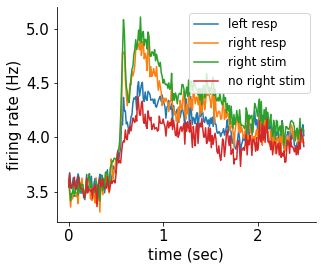

In [ ]:
#@title basic plots of population average
from matplotlib import pyplot as plt
dt = dat['bin_size'] # binning at 10 ms
NT = dat['spks'].shape[-1]
print(dat['spks'].shape[1])
ax = plt.subplot(1,5,1)
response = dat['response'] # right - nogo - left (-1, 0, 1)
vis_right = dat['contrast_right'] # 0 - low - high
vis_left = dat['contrast_left'] # 0 - low - high
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,response>=0].mean(axis=(0,1))) # left responses
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,response<0].mean(axis=(0,1))) # right responses
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,vis_right>0].mean(axis=(0,1))) # stimulus on the right
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,vis_right==0].mean(axis=(0,1))) # no stimulus on the right

plt.legend(['left resp', 'right resp', 'right stim', 'no right stim'], fontsize=12)
ax.set(xlabel  = 'time (sec)', ylabel = 'firing rate (Hz)');

print(dat['pupil'][0][6,1], dat['pupil'][1][1,1], dat['pupil'][2][5,1])

In [ ]:
# groupings of brain regions
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                ]

nareas = 4 # only the top 4 regions are in this particular mouse
NN = len(dat['brain_area']) # number of neurons
barea = nareas * np.ones(NN, ) # last one is "other"
for j in range(nareas):
  barea[np.isin(dat['brain_area'], brain_groups[j])] = j # assign a number to each region




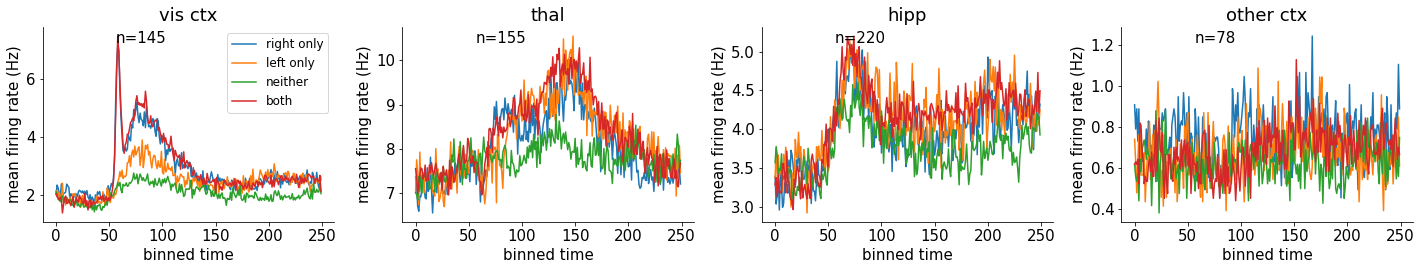

In [ ]:
#@title plots by brain region and visual conditions
for j in range(nareas):
  ax = plt.subplot(1,nareas,j+1)
  
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left==0, vis_right>0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left>0 , vis_right==0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left==0 , vis_right==0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left>0, vis_right>0)].mean(axis=(0,1)))  
  plt.text(.25, .92, 'n=%d'%np.sum(barea==j), transform=ax.transAxes)
 
  if j==0:
    plt.legend(['right only', 'left only', 'neither', 'both'], fontsize=12)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)', title = regions[j])


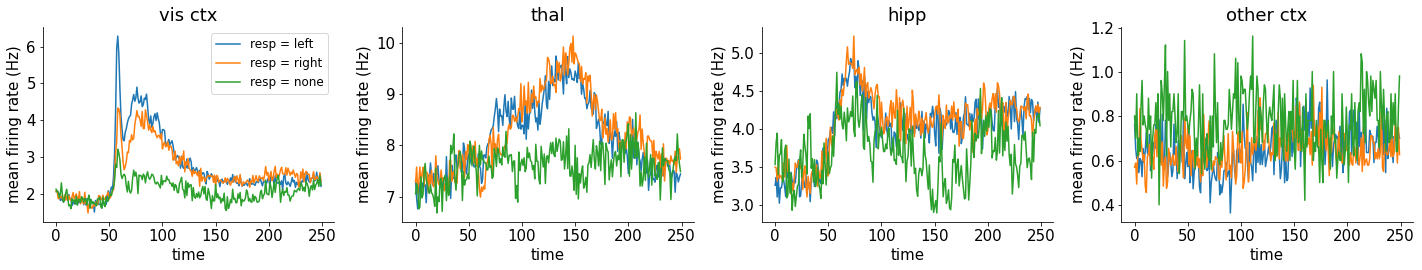

In [ ]:
#@title plots by brain region and response type
for j in range(nareas):
  ax = plt.subplot(1,nareas,j+1)
  plt.title(regions[j])
  if np.sum(barea==j)==0:
    continue
  plt.plot(1/dt * dat['spks'][barea==j][:,response<0].mean(axis=(0,1)))  
  plt.plot(1/dt * dat['spks'][barea==j][:,response>0].mean(axis=(0,1)))
  plt.plot(1/dt * dat['spks'][barea==j][:,response==0].mean(axis=(0,1)))
 
  if j==0:
    plt.legend(['resp = left', 'resp = right', 'resp = none'], fontsize=12)
  ax.set(xlabel = 'time', ylabel = 'mean firing rate (Hz)')


In [ ]:
#@title top PC directions from stimulus + response period, with projections of the entire duration
from sklearn.decomposition import PCA 

droll = np.reshape(dat['spks'][:,:,51:130], (NN,-1)) # first 80 bins = 1.6 sec
print(dat["spks"].shape)
print(droll.T.shape)
droll = droll - np.mean(droll, axis=1)[:, np.newaxis]
model = PCA(n_components = 5).fit(droll.T)
W = model.components_

pc_10ms = W @ np.reshape(dat['spks'], (NN,-1))
pc_10ms = np.reshape(pc_10ms, (5, -1, NT))
#pc_10ms = pc_10ms.mean(2)
#print(pc_10ms.shape)


(698, 340, 250)
(26860, 698)


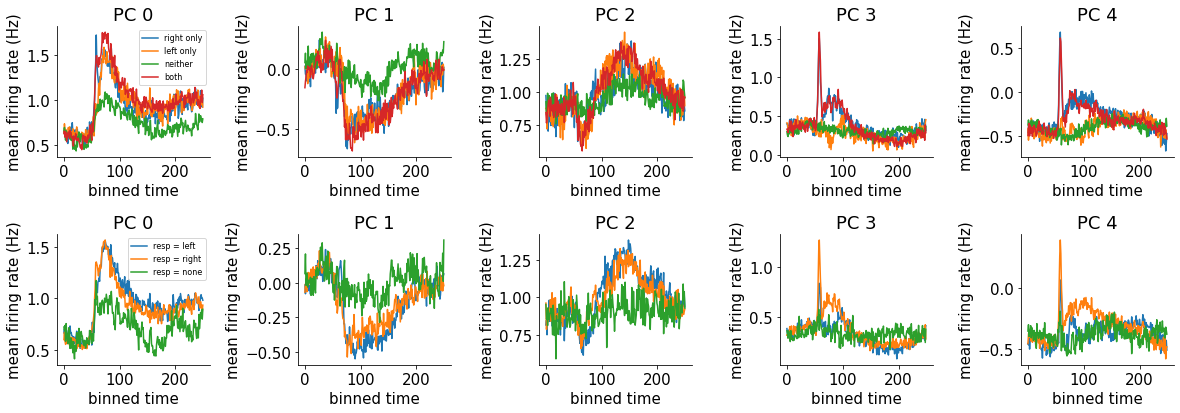

In [ ]:
#@title The top PCs capture most variance across the brain. What do they care about? 
plt.figure(figsize= (20, 6))
for j in range(len(pc_10ms)):
  ax = plt.subplot(2,len(pc_10ms)+1,j+1)
  pc1 = pc_10ms[j]

  plt.plot(pc1[np.logical_and(vis_left==0, vis_right>0), :].mean(axis=0))  
  plt.plot(pc1[np.logical_and(vis_left>0, vis_right==0), :].mean(axis=0))
  plt.plot(pc1[np.logical_and(vis_left==0, vis_right==0), :].mean(axis=0))
  plt.plot(pc1[np.logical_and(vis_left>0, vis_right>0), :].mean(axis=0))
   
  if j==0:
    plt.legend(['right only', 'left only', 'neither', 'both'], fontsize=8)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  plt.title('PC %d'%j)

  ax = plt.subplot(2,len(pc_10ms)+1,len(pc_10ms)+1 + j+1)
  
  plt.plot(pc1[response>0, :].mean(axis=0))  
  plt.plot(pc1[response<0, :].mean(axis=0))
  plt.plot(pc1[response==0, :].mean(axis=0))

  if j==0:
    plt.legend(['resp = left', 'resp = right', 'resp = none'], fontsize=8)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  plt.title('PC %d'%j)

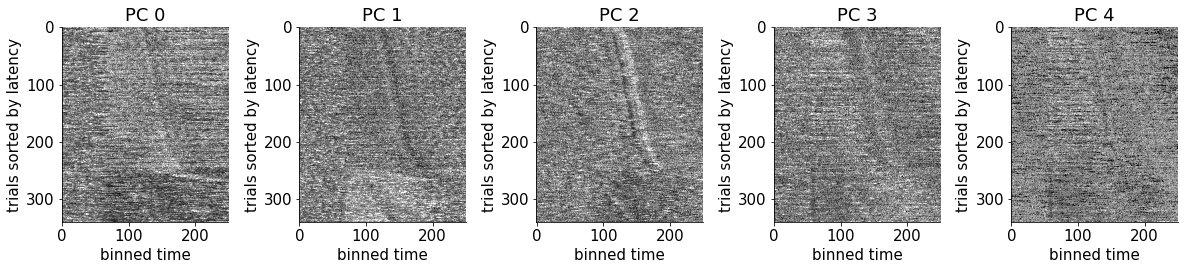

In [ ]:
#@title now sort all trials by response latency and see if the PCs care about that.
from scipy.stats import zscore

isort = np.argsort(dat['response_time'].flatten())

for j in range(len(pc_10ms)):
  ax = plt.subplot(1,len(pc_10ms)+1,j+1)
  pc1 = zscore(pc_10ms[j])
  plt.imshow(pc1[isort, :], aspect='auto', vmax=2, vmin = -2, cmap = 'gray')
  ax.set(xlabel = 'binned time', ylabel = 'trials sorted by latency')
  plt.title('PC %d'%j)

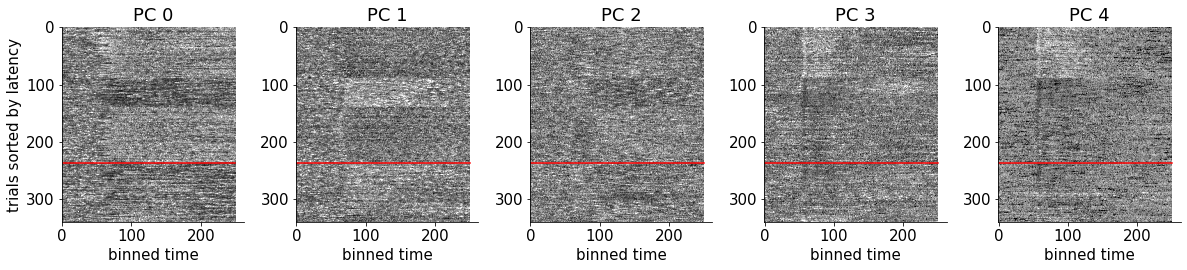

In [ ]:
#@title correct vs incorrect trials
# the following are the correct responses:
# if vis_left > vis_right : response >0
# if vis_left < vis_right : response <0
# if vis_left = vis_right : response =0
# trials below red line are incorrect
is_correct = np.sign(response)==np.sign(vis_left-vis_right)

# sort by correct, and then by response
isort = np.argsort(-is_correct.astype('float32') + response/10) 

nwrong = np.sum(is_correct)
for j in range(len(pc_10ms)):
  ax = plt.subplot(1,len(pc_10ms)+1,j+1)
  pc1 = zscore(pc_10ms[j])
  plt.imshow(pc1[isort, :], aspect='auto', vmax=2, vmin = -2, cmap = 'gray')
  ax.set(xlabel = 'binned time')
  if j==0:
    ax.set(ylabel = 'trials sorted by latency')  
  plt.title('PC %d'%j)

  plt.plot([0, NT], [nwrong, nwrong], 'r')


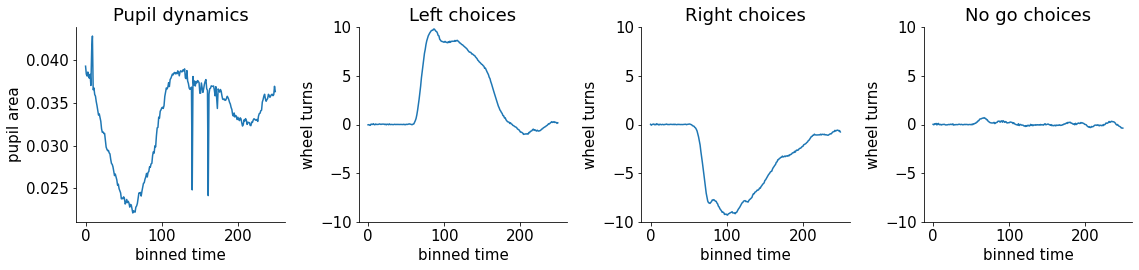

In [ ]:
# plot the behavioral data (pupil area is noisy because it's very small)

ax = plt.subplot(1,5,1)
plt.plot(dat['pupil'][0, :].mean(0));
ax.set(ylabel='pupil area', xlabel = 'binned time', title='Pupil dynamics')

yl = [-10, 10]
ax = plt.subplot(1,5,2)
plt.plot(dat['wheel'][0, response>0].mean(0));
ax.set(ylim=yl)
ax.set(ylim=yl, ylabel='wheel turns', xlabel = 'binned time', title='Left choices');

ax = plt.subplot(1,5,3)
plt.plot(dat['wheel'][0, response<0].mean(0));
ax.set(ylim=yl)
ax.set(ylim=yl, ylabel='wheel turns', xlabel = 'binned time', title='Right choices');

ax = plt.subplot(1,5,4)
plt.plot(dat['wheel'][0, response==0].mean(0));
ax.set(ylim=yl, ylabel='wheel turns', xlabel = 'binned time', title='No go choices');


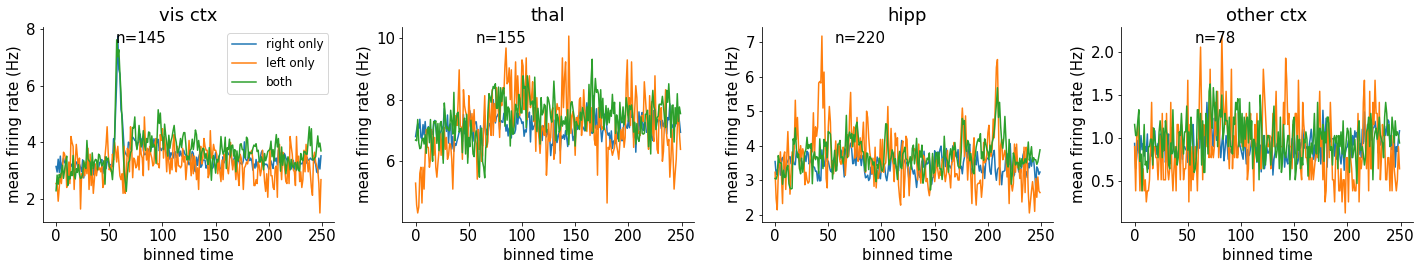

In [ ]:
# plots by brain region and visual conditions for PASSIVE trials
vis_left_p = dat['contrast_left_passive']
vis_right_p = dat['contrast_right_passive']
for j in range(nareas):
  ax = plt.subplot(1,nareas,j+1)
  plt.title(regions[j])
  
  plt.plot(1/dt *  dat['spks_passive'][barea==j][:,np.logical_and(vis_left_p==0, vis_right_p>0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks_passive'][barea==j][:,np.logical_and(vis_left_p>0 , vis_right_p==0)].mean(axis=(0,1)))
  #plt.plot(1/dt *  dat['spks_passive'][barea==j][:,np.logical_and(vis_left_p==0 , vis_right_p==0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks_passive'][barea==j][:,np.logical_and(vis_left_p>0, vis_right_p>0)].mean(axis=(0,1)))  
  plt.text(.25, .92, 'n=%d'%np.sum(barea==j), transform=ax.transAxes)
 
  if j==0:
    plt.legend(['right only', 'left only', 'both'], fontsize=12)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')

# **PROJECT CODE BEGINS HERE**

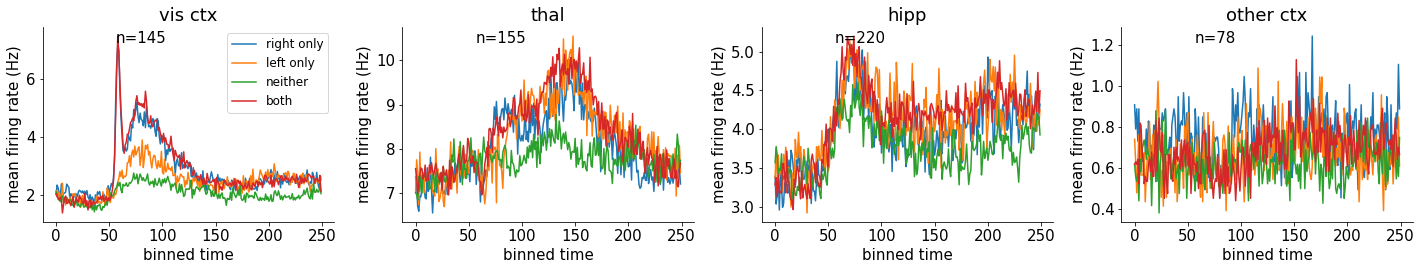

In [ ]:
#Obtaining Fano Factor for different brain re
for j in range(nareas):
  ax = plt.subplot(1,nareas,j+1)
  
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left==0, vis_right>0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left>0 , vis_right==0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left==0 , vis_right==0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left>0, vis_right>0)].mean(axis=(0,1)))  
  plt.text(.25, .92, 'n=%d'%np.sum(barea==j), transform=ax.transAxes)
 
  if j==0:
    plt.legend(['right only', 'left only', 'neither', 'both'], fontsize=12)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)', title = regions[j])

# **Sessions and Missing Brain Regions**

In [ ]:



# groupings of brain regions
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                ]


for i in range(len(alldat)):
  dat = alldat[i]
  missing =[]
  nareas = 4 # only the top 4 regions are in this particular mouse
  NN = len(dat['brain_area']) # number of neurons
  barea = nareas * np.ones(NN, ) # last one is "other"
  for j in range(nareas):
    barea[np.isin(dat['brain_area'], brain_groups[j])] = j # assign a number to each region
    regions = ["vis ctx", "thal", "hipp", "other ctx"]
    if np.all(dat['spks'][barea==j][:,:] == 0):
      missing.append(regions[j])
  if missing != []:
    a = None
    print('Recoring {} is missing brain region(s) {}'.format(i, missing))


Recoring 0 is missing brain region(s) ['thal']
Recoring 1 is missing brain region(s) ['thal', 'other ctx']
Recoring 2 is missing brain region(s) ['other ctx']
Recoring 4 is missing brain region(s) ['thal']
Recoring 5 is missing brain region(s) ['vis ctx']
Recoring 6 is missing brain region(s) ['vis ctx']
Recoring 9 is missing brain region(s) ['other ctx']
Recoring 10 is missing brain region(s) ['vis ctx', 'hipp']
Recoring 13 is missing brain region(s) ['thal']
Recoring 14 is missing brain region(s) ['vis ctx', 'other ctx']
Recoring 15 is missing brain region(s) ['vis ctx']
Recoring 16 is missing brain region(s) ['vis ctx', 'hipp', 'other ctx']
Recoring 17 is missing brain region(s) ['vis ctx', 'other ctx']
Recoring 18 is missing brain region(s) ['other ctx']
Recoring 19 is missing brain region(s) ['other ctx']
Recoring 20 is missing brain region(s) ['vis ctx', 'hipp']
Recoring 21 is missing brain region(s) ['thal', 'hipp']
Recoring 22 is missing brain region(s) ['other ctx']
Recoring 2

# **Fano Factor with Chaning Bin size**

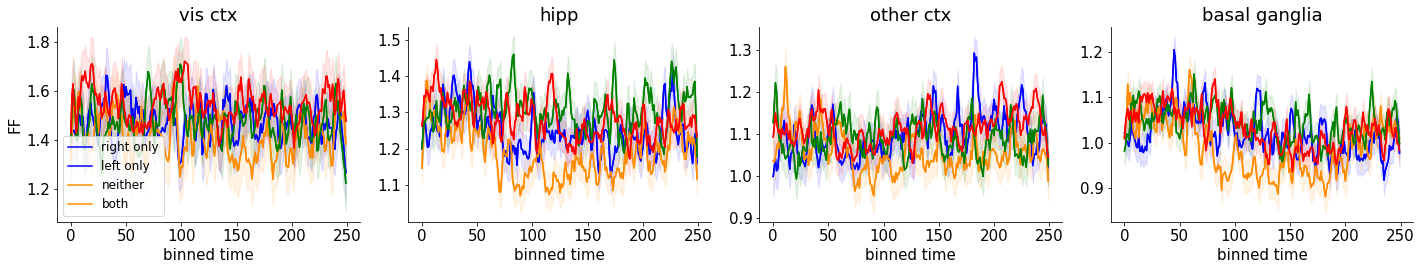

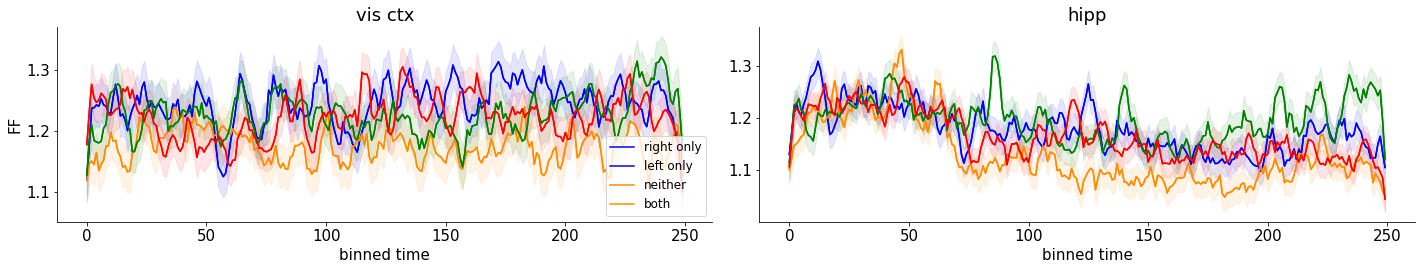

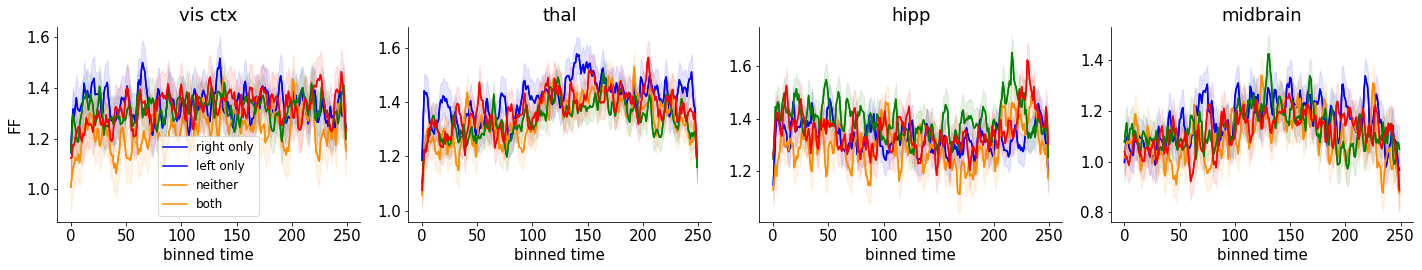

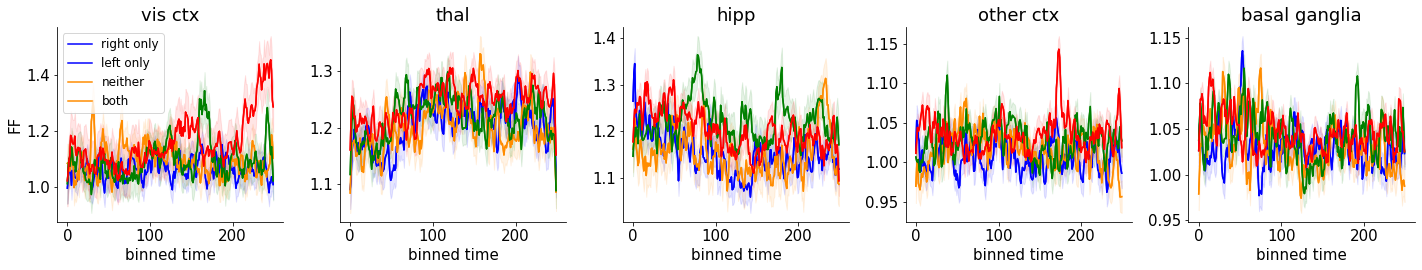

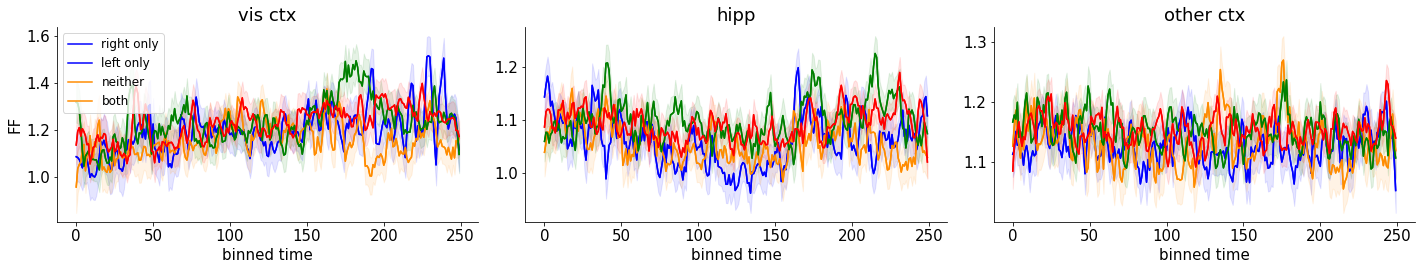

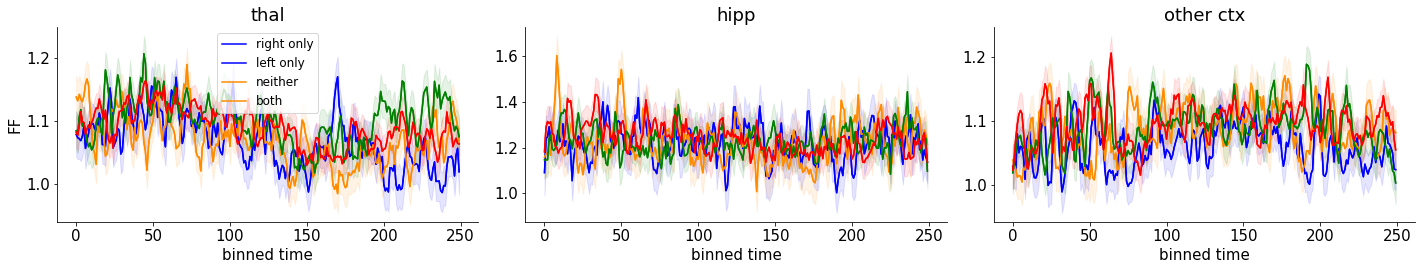

In [ ]:
#@title Fano Factor with chaning the bin size
from scipy import signal
import warnings
warnings.filterwarnings('ignore')
colors = ['blue','darkorange','green','red']
def errorfill(x, y, yerr, color=None, alpha_fill=0.1, ax=None,label=None):
    ax = ax if ax is not None else plt.gca()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    
    ax.fill_between(x, ymax, ymin, alpha=alpha_fill,color=color)
    ax.plot(x, y,color=color,label=label)

def bin_change(x,old_binsize,new_binsize,option='box'):
  '''
  x is the 3D array containing spikes x trial x bins
  old_binsize is the original bin size (here it is 10 ms)
  old_binsize is the new bin size (e.g. 50 or 100 ms)
  this code implements the sliding window for changing the binsize
  '''
  numBin = int(new_binsize/old_binsize)       # caution: for now it only works if mod(old_binsize,new_binsize)==0
  
  if option == 'box':
    sliding_vec = np.ones((numBin,))
  elif option == 'gauss':
    sliding_vec = signal.gaussian(numBin, std=1)

  output = np.zeros_like(x)
  for neuron in range(x.shape[0]):
    for trial in range(x.shape[1]):
      
      output[neuron,trial,:]= np.convolve(x[neuron,trial,:],sliding_vec,'same') #careful with the edge effect. another option is valid which reduces the size of the vector
  
  return output
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
sessions_list = [0,1,2,3,4,5] #the list for choosing the sessions
for iter,session in enumerate(sessions_list):
  dat = alldat[session]
  vis_right = dat['contrast_right'] # 0 - low - high
  vis_left = dat['contrast_left'] # 0 - low - high
  stim_conditions = {0: np.logical_and(vis_left==0, vis_right>0),
              1: np.logical_and(vis_left>0 , vis_right==0),
              2: np.logical_and(vis_left==0 , vis_right==0),
              3: np.logical_and(vis_left>0, vis_right>0)
              }
  NN = len(dat['brain_area']) # number of neurons
  barea = np.ones(NN, ) # last one is "other"
  barea[:] = np.NaN
  lines = []
  for k in range(len(brain_groups)):
    barea[np.isin(dat['brain_area'], brain_groups[k])] = k # assign a number to each region
  x = barea[~np.isnan(barea)]
  areas = np.unique(x) 
  for i in range(len(stim_conditions)):
    for j, area in enumerate(areas):
      fig = plt.figure(iter)
      y1 = dat['spks'][barea==area][:,stim_conditions[i]]    
      ax = plt.subplot(1,len(areas),j+1) 
      y1 = bin_change(y1,10,50,'box') 
      fano_factor = np.var(y1, axis = 1)/np.mean(y1, axis = 1)     
      plt.plot(np.nanmean(fano_factor, axis = 0),color = colors[i])
      yerr = np.nanstd(fano_factor)/np.sqrt(np.count_nonzero(~np.isnan(fano_factor), axis=0))
      errorfill(range(y1.shape[2]),np.nanmean(fano_factor, axis = 0),yerr , color =colors[i])
      if j==0:
               
        plt.legend(['right only', 'left only', 'neither', 'both'], fontsize=12)
        ax.set(ylabel = 'FF')
        
      ax.set(xlabel = 'binned time', title = regions[int(area)])

# Variability of a neuron's activity across trials to the same stim



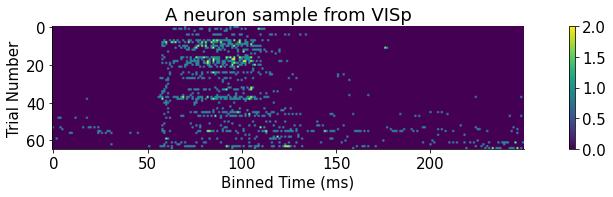

In [ ]:
fig, ax1 = plt.subplots(figsize=(13, 3), ncols=1)
session_num = 11
neuron_num =  100 
dat = alldat[session_num]
vis_right = dat['contrast_right'] # 0 - low - high
vis_left = dat['contrast_left'] # 0 - low - high
pos = plt.imshow(dat['spks'][neuron_num,np.logical_and(vis_left==0, vis_right>0), :])  
ax1.set(xlabel = 'Binned Time (ms)', ylabel = 'Trial Number', title = 'A neuron sample from ' + dat['brain_area'][neuron_num] )
fig.colorbar(pos , ax = ax1)

#Uncomment for saving
# from google.colab import files
# plt.savefig('neural_variance.png', format='png')
# files.download("neural_variance.png")


# **Principal Component Analysis Function**



In [ ]:


def build_PC(dat_spks):

  from sklearn.linear_model import LogisticRegression
  from sklearn.model_selection import cross_val_score
  from sklearn.decomposition import PCA 


  droll = dat_spks[:, :, 51:130].sum(2)  # 698x340
  # droll = np.reshape(droll, (NN,-1)) # first 80 bins = 1.6 sec
  droll = droll - np.mean(droll, axis=1)[:, np.newaxis]
  nComp = 5 # number of components we want to choose
  model = PCA(n_components = nComp).fit(droll.T)
  W = model.components_
  pc_10ms = W @ np.sum(dat_spks, axis=2)

  pca = pc_10ms.T # this is organized by: trial x principal_component e.g. 340x8

  return pca

def build_PC_ExplVariance(dat_spks, nComp=5):

  from sklearn.linear_model import LogisticRegression
  from sklearn.model_selection import cross_val_score
  from sklearn.decomposition import PCA 


  droll = dat_spks[:, :, 51:130].sum(2)  # 698x340
  # droll = np.reshape(droll, (NN,-1)) # first 80 bins = 1.6 sec
  droll = droll - np.mean(droll, axis=1)[:, np.newaxis]
  #nComp = 5 # number of components we want to choose
  model = PCA(n_components = nComp).fit(droll.T)
  W = model.components_
  Expl_variance = model.explained_variance_ratio_
  pc_10ms = W @ np.sum(dat_spks, axis=2)

  pca = pc_10ms.T # this is organized by: trial x principal_component e.g. 340x8

  return Expl_variance


# **Building Design Matrix Function**

In [ ]:



def build_design_matrix(features, history, row, add_init_features, combine_hist):
    """
    Builds design matrix

    Args:
    features (dict of array of floats): Features to be placed in design matrix

    history (scalar): order of history, example if history = 5, you only conside features from trial T up to trial T - 5

    add_init_features (string): Condition to add the current history to the featuresarray

    Returns:
    (numpy array of floats) : for design matrix "X"
    
    (numpy array of floats) : To the right of the features are the features repeated trunctated at history 'T - history'

                          
                              

    """
    # Check that the features have same row number before computing.

    from sklearn.preprocessing import normalize

    if combine_hist == "yes":
      
      features_temp = features.keys()
      if 'pca' in features_temp:
        pca = features['pca']

      for feature in features.values():
        assert feature.shape[0] == row

      # stores features in another list for later use
      features_list = []
      for feat in features.values():
        features_list.append(feat)

      # turn features into an empty array to store transformed values later
      features = np.empty([features_list[0].shape[0], 0])
      history_features = np.empty([features_list[0].shape[0], 0])
      
      for feature in features_list:
        if feature.shape == (row,):
          feature = feature[:, np.newaxis]
        if feature.shape[1] > 1:  
            continue             
        else:
          features = np.append(features, feature, axis=1)


      # Create slice of required. This will be of shape (history, features.shape[1])
      for i in range(1, history + 1):
        history_feature = features[:-i, :]

        # create a matrix  with zeros of shape (feat_row_number - history, feat_col-number)
        # if history = 5, shape of zero matrix is (343-5, feature.shape[1])

        zero_matrix = np.zeros((i, features.shape[1]))

        # pad new history_feature with zero_matrix along columns to create proper shape
        history_feature = np.append(zero_matrix, history_feature, axis=0)
        history_features = np.append(history_features, history_feature, axis = 1)


      if 'pca' in features_temp:
        pca_new = normalize(pca, norm="l2", axis=0)
        features = np. append(pca_new, history_features, axis=1)

    else: 
      for feature in features.values():
        assert feature.shape[0] == row

      # stores features in another list for later use
      features_list = list(features.values())

      # turn features into an empty array to store transformed values later
      features = np.empty([features_list[0].shape[0], 0])
      history_features = np.empty([features_list[0].shape[0], 0])


      for feature in features_list:
        if feature.shape == (row,):
          feature = feature[:, np.newaxis]
        features = np.append(features, feature, axis=1)

      features = normalize(features, norm="l2", axis=0)


      # Create slice of required. This will be of shape (history, features.shape[1])
      for i in range(1, history + 1):
        history_feature = features[:-i, :]

        # create a matrix  with zeros of shape (feat_row_number - history, feat_col-number)
        # if history = 5, shape of zero matrix is (343-5, feature.shape[1])

        zero_matrix = np.zeros((i, features.shape[1]))

        # pad new history_feature with zero_matrix along columns to create proper shape
        history_feature = np.append(zero_matrix, history_feature, axis=0)
        history_features = np.append(history_features, history_feature, axis = 1)

      if add_init_features == "yes": 
        # append history_feature to features and return result to user
        features = np.append(features, history_features, axis=1)
      else:
        features = history_features

    return features


# **Linear Regression Model as a Package. Reaction: Time Prediction**





In [ ]:


def LinRegmodel(sessions, feature_list, num_history, add_init_features, 
             combine_hist, by_region="no"):
  
    
  """
    to predict the response type by using a logistic regression model
    the method of scoring is accuracy

    Baseline model: uses only the neural activity of current trial (pc of current trial) 

    Trial history model: uses the neural activity of current trial in combination to history of 
                        either only behavioral data or behavioral and neural data. 

    Inputs:

      sessions:     list of sessions to be plotted

      num_history: a scalar defining how many trial back in history to be considered in the design matrix

      features:    a dictionary of fearures--keys only, passed as strings--to be considered in designing the matrix

      add_init_feature: (yes/no) adding the current features in the design matrix

      comine history:   (yes/no) adding the current pca to the design matrix  while not using the current data of other defined features.

    Output:

      an array (number of sessions by 2). 
      each row contains average of accuracy of the trial 
      history model on the first column and average of explained 
      variance of the baseline model on the second column 


  """ 
  from sklearn.linear_model import LinearRegression
  from sklearn.model_selection import cross_val_score
  from sklearn.preprocessing import normalize


  #features = {'pca': pca, 'feedback_type': dat["feedback_type"], 
  #            'response': dat['response'], 'react_time': dat['reaction_time'][:,0]}


  if by_region == 'no':

    explvar_by_session = np.empty((len(sessions), 2))


    for i,session in enumerate(sessions):

      dat = alldat[session]
      pca = build_PC(dat["spks"])
      y = dat["reaction_time"][:,0]
     

      #features['pca'] = pca

      for feature in features.keys():
        if feature == "pca":
          continue  
        else:
          features[feature] = dat[feature]

      row = features['response_time'].shape[0]
  
      #Normalize Baseline Design matrix
      Base_line = normalize(dat['gocue'], norm="l2", axis=0)[np.where(y != np.inf)]

      #Build Model Design Matrix
      X = build_design_matrix(features, num_history, row, add_init_features, combine_hist)
      X = np.append(normalize(dat['gocue'], norm='l2', axis=0), X, axis=1)

      X = X[np.where(y != np.inf)]
      y = y[np.where(y != np.inf)]


      expl_var = cross_val_score(LinearRegression(), X, y, cv=8, 
                                 scoring='explained_variance') 
      expl_var_basl = cross_val_score(LinearRegression(), Base_line, y, cv=8,
                                      scoring='explained_variance') 

      explvar_by_session[i, 0] = np.mean(expl_var)
      explvar_by_session[i, 1] = np.mean(expl_var_basl)

  # This section of the code is run if statistics by region is required
  else:

    nareas = 7 
    explvar_by_session = np.zeros((nareas, len(sessions), 2))
    

    for i,session in enumerate(sessions):


      dat = alldat[session]
      pca = build_PC(dat["spks"])
      y = dat["reaction_time"][:,0]
  

      # groupings of brain regions

      regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia"
                 ,"cortical subplate", "other"]

      brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                      ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT"
                      , "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                      ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                      ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", 
                      "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                      ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                      ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                      ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                      ]

      
      NN = len(dat['brain_area']) # number of neurons
      barea = nareas * np.ones(NN, )
      for j in range(nareas):
        barea[np.isin(dat['brain_area'], brain_groups[j])] = j # assign a number to each region


      for j in range(nareas):

        if np.all(dat['spks'][barea==j][:,:] == 0):
          continue
        else:
          pca = build_PC(dat['spks'][barea==j])


          features['pca'] = pca

          for feature in features.keys():
            if feature == "pca":
              continue  
            else:
              features[feature] = dat[feature]

          row = features['pca'].shape[0]
      
          #Normalize Baseline Design matrix
          Base_line = normalize(features['pca'], norm="l2", axis=0)[np.where(y != np.inf)]

          #Build Model Design Matrix
          X = build_design_matrix(features, num_history, row, add_init_features, combine_hist)
          X = X[np.where(y != np.inf)]
          y = y[np.where(y != np.inf)]

              
          expl_var = cross_val_score(LinearRegression(), X, y, cv=4, 
                                    scoring='explained_variance') 
          expl_var_basl = cross_val_score(LinearRegression(), Base_line, y, cv=4,
                                          scoring='explained_variance') 

          explvar_by_session[j, i, 0] = np.mean(expl_var)
          explvar_by_session[j, i, 1] = np.mean(expl_var_basl)


  return explvar_by_session




In [ ]:
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia"
          , "cortical subplate", "other"]
          
features = {'feedback_type': "", 'response_time': ""}

Expl_Vars = LinRegmodel([3, 11, 26, 29, 34, 38], features, 1, add_init_features='yes',
                         combine_hist='no', by_region='no')
print(Expl_Vars)


[[-0.05976665  0.00541216]
 [ 0.20590222 -0.00983639]
 [ 0.36905549  0.01561651]
 [-0.81743143 -0.03792123]
 [ 0.3923416  -0.00652776]
 [ 0.36485191 -0.01068357]]


# **Linear Regression Model as a Package. Response: Time Prediction**


In [ ]:


def LinRegmodel(sessions, feature_list, num_history, add_init_features, 
             combine_hist, by_region="no"):
  
    
  """
    to predict the response type by using a logistic regression model
    the method of scoring is accuracy

    Baseline model: uses only the neural activity of current trial (pc of current trial) 

    Trial history model: uses the neural activity of current trial in combination to history of 
                        either only behavioral data or behavioral and neural data. 

    Inputs:

      sessions:     list of sessions to be plotted

      num_history: a scalar defining how many trial back in history to be considered in the design matrix

      features:    a dictionary of fearures--keys only, passed as strings--to be considered in designing the matrix

      add_init_feature: (yes/no) adding the current features in the design matrix

      comine history:   (yes/no) adding the current pca to the design matrix  while not using the current data of other defined features.

    Output:

      an array (number of sessions by 2). 
      each row contains average of accuracy of the trial 
      history model on the first column and average of explained 
      variance of the baseline model on the second column 


  """ 
  from sklearn.linear_model import LinearRegression
  from sklearn.model_selection import cross_val_score
  from sklearn.preprocessing import normalize


  #features = {'pca': pca, 'feedback_type': dat["feedback_type"], 
  #            'response': dat['response'], 'react_time': dat['reaction_time'][:,0]}


  if by_region == 'no':

    explvar_by_session = np.empty((len(sessions), 2))


    for i,session in enumerate(sessions):

      dat = alldat[session]
      pca = build_PC(dat["spks"])

     

      features['pca'] = pca

      for feature in features.keys():
        if feature == "pca":
          continue  
        else:
          features[feature] = dat[feature]

      row = features['pca'].shape[0]
  
      #Normalize Baseline Design matrix
      Base_line = normalize(features['pca'], norm="l2", axis=0)

      #Build Model Design Matrix
      X = build_design_matrix(features, num_history, row, add_init_features, combine_hist)
 
      y = dat["response_time"]


      expl_var = cross_val_score(LinearRegression(), X, y, cv=8, 
                                 scoring='explained_variance') 
      expl_var_basl = cross_val_score(LinearRegression(), Base_line, y, cv=8,
                                      scoring='explained_variance') 

      explvar_by_session[i, 0] = np.mean(expl_var)
      explvar_by_session[i, 1] = np.mean(expl_var_basl)

  # This section of the code is run if statistics by region is required
  else:

    nareas = 7 
    explvar_by_session = np.zeros((nareas, len(sessions), 2))
    

    for i,session in enumerate(sessions):


      dat = alldat[session]

      # groupings of brain regions

      regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia"
                 ,"cortical subplate", "other"]

      brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                      ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT"
                      , "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                      ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                      ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", 
                      "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                      ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                      ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                      ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                      ]

      
      NN = len(dat['brain_area']) # number of neurons
      barea = nareas * np.ones(NN, )
      for j in range(nareas):
        barea[np.isin(dat['brain_area'], brain_groups[j])] = j # assign a number to each region


      for j in range(nareas):

        if np.all(dat['spks'][barea==j][:,:] == 0):
          continue
        else:
          pca = build_PC(dat['spks'][barea==j])


          features['pca'] = pca

          for feature in features.keys():
            if feature == "pca":
              continue  
            else:
              features[feature] = dat[feature]

          row = features['pca'].shape[0]
      
          #Normalize Baseline Design matrix
          Base_line2 = normalize(features['pca'], norm="l2", axis=0)

          #Build Model Design Matrix
          X = build_design_matrix(features, num_history, row, add_init_features, combine_hist)

          y = dat["response_time"]

              
          expl_var = cross_val_score(LinearRegression(), X, y, cv=4, 
                                    scoring='explained_variance') 
          expl_var_basl = cross_val_score(LinearRegression(), Base_line2, y, cv=4,
                                          scoring='explained_variance') 

          explvar_by_session[j, i, 0] = np.mean(expl_var)
          explvar_by_session[j, i, 1] = np.mean(expl_var_basl)


  return explvar_by_session



In [ ]:
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia"
          , "cortical subplate", "other"]
          
features = {'pca': "", 'feedback_type': "", 'response_time': ""}

Expl_Vars = LinRegmodel([3, 11, 26, 29, 34, 38], features, 5, add_init_features='no',
                         combine_hist='yes', by_region='no')

print(Expl_Vars)

[[0.75979704 0.76823569]
 [0.44878369 0.45217894]
 [0.41974598 0.46510259]
 [0.82055759 0.83176334]
 [0.47795031 0.46724444]
 [0.51375838 0.51298327]]


# **Logistic Regression Model as a Package**

In [ ]:


## Package this into a function
## Try predictions for PCs


def LogRegmodel(sessions, feature_list, num_history, add_init_features, 
             combine_hist, by_region="no"):
  
  """
    to predict the response type by using a logistic regression model the method of scoring is accuracy

    Baseline model: uses only the neural activity of current trial (pc of current trial) 

    Trial history model: uses the neural activity of current trial in combination to history of either 
                          only behavioral data or behavioral and neural data. 

    Inputs:

      sessions:     list of sessions to be plotted

      num_history: a scalar defining how many trial back in history to be considered in the design matrix

      features:  a dictionary of fearures--keys only, passed as strings--to be considered in designing the matrix 

      add_init_feature: (yes/no) adding the current features in the design matrix

      comine history:   (yes/no) adding the current pca to the design matrix while not using the current data of other defined features.

    Output:

      an array (number of sessions by 2). 
      each row contains average of accuracy of the trial 
      history model on the first column and average of explained 
      variance of the baseline model on the second column 


  """

  from sklearn.linear_model import LogisticRegression
  from sklearn.model_selection import cross_val_score
  from sklearn.preprocessing import normalize

  if by_region == 'no':

    accuracy_by_session = np.empty((len(sessions), 2))


    for i,session in enumerate(sessions):

      dat = alldat[session]
      pca = build_PC(dat["spks"])

      dat['response'] = dat['response'] + 1
      
      features['pca'] = pca

      for feature in features.keys():
        if feature == "pca":
          continue  
        else:
          features[feature] = dat[feature]

      row = features['pca'].shape[0]
  
      #Normalize Baseline Design matrix
      Base_line2 = normalize(features['pca'], norm="l2", axis=0)

      #Build Model Design Matrix
      X = build_design_matrix(features, num_history, row, add_init_features, combine_hist)

      y = dat['response'] + 1


      accuracies = cross_val_score(LogisticRegression(penalty='l2', solver='liblinear', 
                                   multi_class='ovr'), X, y, cv=8) 
      accuracies_basl = cross_val_score(LogisticRegression(penalty='l2', solver='liblinear',
                                        multi_class='ovr'), Base_line2, y, cv=8) 

      accuracy_by_session[i, 0] = np.mean(accuracies)
      accuracy_by_session[i, 1] = np.mean(accuracies_basl)

  else:

    nareas = 7 
    accuracy_by_session = np.zeros((nareas, len(sessions), 2))
    

    for i,session in enumerate(sessions):

      dat = alldat[session]
      dat['response'] = dat['response'] + 1
      y = dat['response'] + 1

      # groupings of brain regions

      regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia"
                , "cortical subplate", "other"]

      brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                      ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT"
                      , "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                      ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                      ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", 
                      "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                      ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                      ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                      ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                      ]

      
      NN = len(dat['brain_area']) # number of neurons
      barea = nareas * np.ones(NN, )
      for j in range(nareas):
        barea[np.isin(dat['brain_area'], brain_groups[j])] = j # assign a number to each region


      for j in range(nareas):
        if dat["spks"][barea==j].shape[0] < 5:
          continue
        elif np.all(dat['spks'][barea==j][:,:] == 0):
          continue
        else:
          pca = build_PC(dat['spks'][barea==j])
        
          features['pca'] = pca

          for feature in features.keys():
            if feature == "pca":
              continue  
            else:
              features[feature] = dat[feature]

          row = features['pca'].shape[0]
      
          #Normalize Baseline Design matrix
          Base_line2 = normalize(features['pca'], norm="l2", axis=0)

          #Build Model Design Matrix
          X = build_design_matrix(features, num_history, row, add_init_features, combine_hist)

          accuracies = cross_val_score(LogisticRegression(penalty='l2', solver='liblinear', 
                                      multi_class='ovr', C=1), X, y, cv=8) 
          accuracies_basl = cross_val_score(LogisticRegression(penalty='l2', solver='liblinear',
                                            multi_class='ovr', C=1), Base_line2, y, cv=8) 

          accuracy_by_session[j, i, 0] = np.mean(accuracies)
          accuracy_by_session[j, i, 1] = np.mean(accuracies_basl)


  return accuracy_by_session



In [ ]:

regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia"
          , "cortical subplate", "other"]
          
features = {'pca': "", 'feedback_type': "",  'response': ""}

accuracies_test = LogRegmodel([j for j in range(1,10)], features, 1, add_init_features='no',
                          combine_hist='yes', by_region="no")
#print(accuracies_test)

In [ ]:

regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia"
          , "cortical subplate", "other"]
          
features = {'pca': "", 'feedback_type': "",  'response': ""}

accuracies = LogRegmodel([3, 11, 26, 29, 34, 38], features, 1, add_init_features='no',
                         combine_hist='yes', by_region="no")
accuracies2 = LogRegmodel([3, 11, 26, 29, 34, 38], features, 3, add_init_features='no',
                         combine_hist='yes', by_region="no")
# print(accuracies)
# print(accuracies2)

# **Results and Figures**

In [ ]:
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia"
          , "cortical subplate", "other"]
          
features = {'pca': "", 'feedback_type': "",  'response': ""}

accuracies_list = np.empty((2,38,4))
s = np.empty((38,4))
for i in range(1, 5):
  accuracies = LogRegmodel([i for i in range(1,39)], features, i, add_init_features='no',
                          combine_hist='yes', by_region="no")
  accuracies_list[:,:,i-1] = accuracies.T
  s[:,i-1] = i
accuracies_plot = np.reshape(accuracies_list,(2,-1))
s_plot = np.concatenate(s)

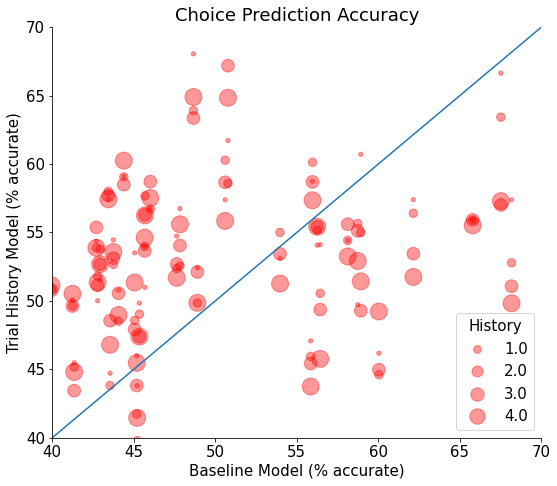

In [ ]:
plt.figure(figsize=(8,7))
scatter = plt.scatter(accuracies_plot[1, :]*100, accuracies_plot[0, :]*100, color=np.array([255,0,0])/255, 
                     s=2*(3*s_plot)**2, alpha=0.4)
kw = dict(prop="sizes", num=5, color=np.array([255,0,0])/255, fmt="{x:}",
        func=lambda s: s/60)
plt.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="History")
plt.plot(np.linspace(40, 70), np.linspace(40, 70))
plt.ylim((40, 70))
plt.xlim((40, 70))
plt.title('Choice Prediction Accuracy')
plt.xlabel("Baseline Model (% accurate)" )
plt.ylabel("Trial History Model (% accurate)")
plt.show()

In [ ]:

print(len(accuracies_list))

2


In [ ]:

regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia"
          , "cortical subplate", "other"]
          
features = {'pca': "", 'feedback_type': "",  'response': ""}

accuracies_list = []

for i in range(1, 5):
  accuracies1 = LogRegmodel([j for j in range(1,39)], features, i, add_init_features='no',
                          combine_hist='yes', by_region="no")
  accuracies_list.append(accuracies1)
  


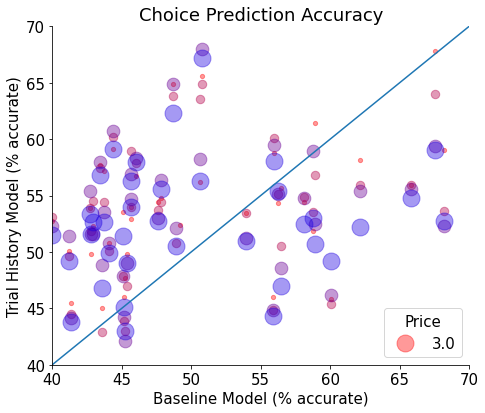

In [ ]:
plt.figure(figsize=(7,6))
colors = [np.array([255,0,0]),np.array([180,0,75]),np.array([105,0,150]),
          np.array([30,0,225]),np.array([0,0,255])]
for i,accuracy in enumerate(accuracies_list):
  scatter = plt.scatter(accuracy[:, 1]*100, accuracy[:, 0]*100, color=colors[i]/255 , s=2*((i + 1)*3)**2, alpha=0.4)

  
s = np.array([1,2,3,4])    
kw = dict(prop="sizes", num=4, color=np.array([255,0,0])/255, fmt="{x:}",
        func=lambda s: np.sqrt(s/2)/3 - 1)
plt.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Price")
plt.plot(np.linspace(40, 70), np.linspace(40, 70))
plt.ylim((40, 70))
plt.xlim((40, 70))
plt.title('Choice Prediction Accuracy')
plt.xlabel("Baseline Model (% accurate)" )
plt.ylabel("Trial History Model (% accurate)")
plt.show()


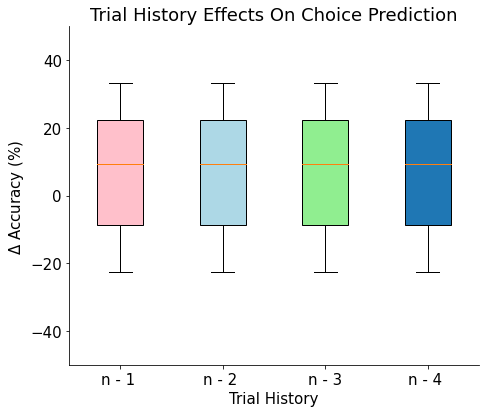

In [ ]:

### BoxPlot for Accuracies
all_data = [ (accuracy[:, 0] - accuracy[:, 1])*100/accuracy[:, 1]   for accuuray in accuracies_list]
labels = ['n - 1 ', 'n - 2 ', 'n - 3', 'n - 4 ']

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks

ax1.set_title('Trial History Effects On Choice Prediction')
ax1.set_ylim(-50, 50)
ax1.set_xlabel("Trial History")
ax1.set_ylabel("$\Delta$ Accuracy (%) ")


# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1,):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

In [ ]:
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia"
          , "cortical subplate", "other"]
          
features = {'pca': "", 'feedback_type': "",  'response': ""}


narea = 7
accuracies2 = LogRegmodel([j for j in range(1,39)], features, 1, add_init_features='no',
                        combine_hist='yes', by_region="yes")

accuracies_list = [accuracies2[i] for i in range(narea)]

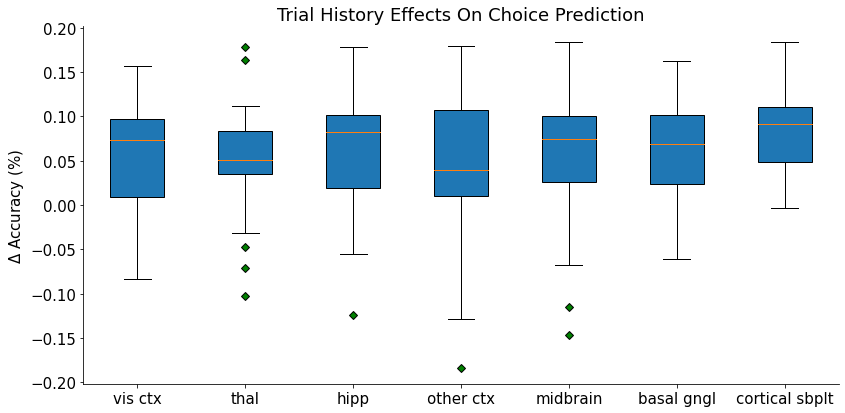

In [ ]:

### BoxPlot for Accuracies
all_data = [ (accuracy[:, 0] - accuracy[:, 1])  for accuracy in accuracies_list]

# choose only values of accuracy that do not have zero
# this is for better vizualization

for i in range(len(all_data)):
  all_data[i] = all_data[i][np.where(all_data[i] != 0)]


labels = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal gngl"
          ,"cortical sbplt"] 

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# rectangular box plot
green_diamond = dict(markerfacecolor='g', marker='D')
bplot2 = ax1.boxplot(all_data,
                    vert=True,  # vertical box alignment
                    patch_artist=True,  # fill with color
                    labels=labels, flierprops=green_diamond)  # will be used to label x-ticks

ax1.set_title('Trial History Effects On Choice Prediction')
ax1.set_ylabel("$\Delta$ Accuracy (%) ")

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'lightblue', 'pink', 'lightblue', 'pink']
for bplot in (bplot1,):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

In [ ]:

regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia"
          , "cortical subplate", "other"]
          
features = {'pca': "", 'feedback_type': "",  'response': ""}

accuracies3 = np.empty((38, 0))

for i in range(1, 21):

  accuracies = LogRegmodel([j for j in range(1,39)], features, i, add_init_features='no',
                          combine_hist='yes', by_region="no")
  accuracies3 = np.append(accuracies3, accuracies[:, 0][:, np.newaxis], axis=1)
  
accuracies3 = np.append(accuracies[:, 1][:, np.newaxis], accuracies3, axis=1)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

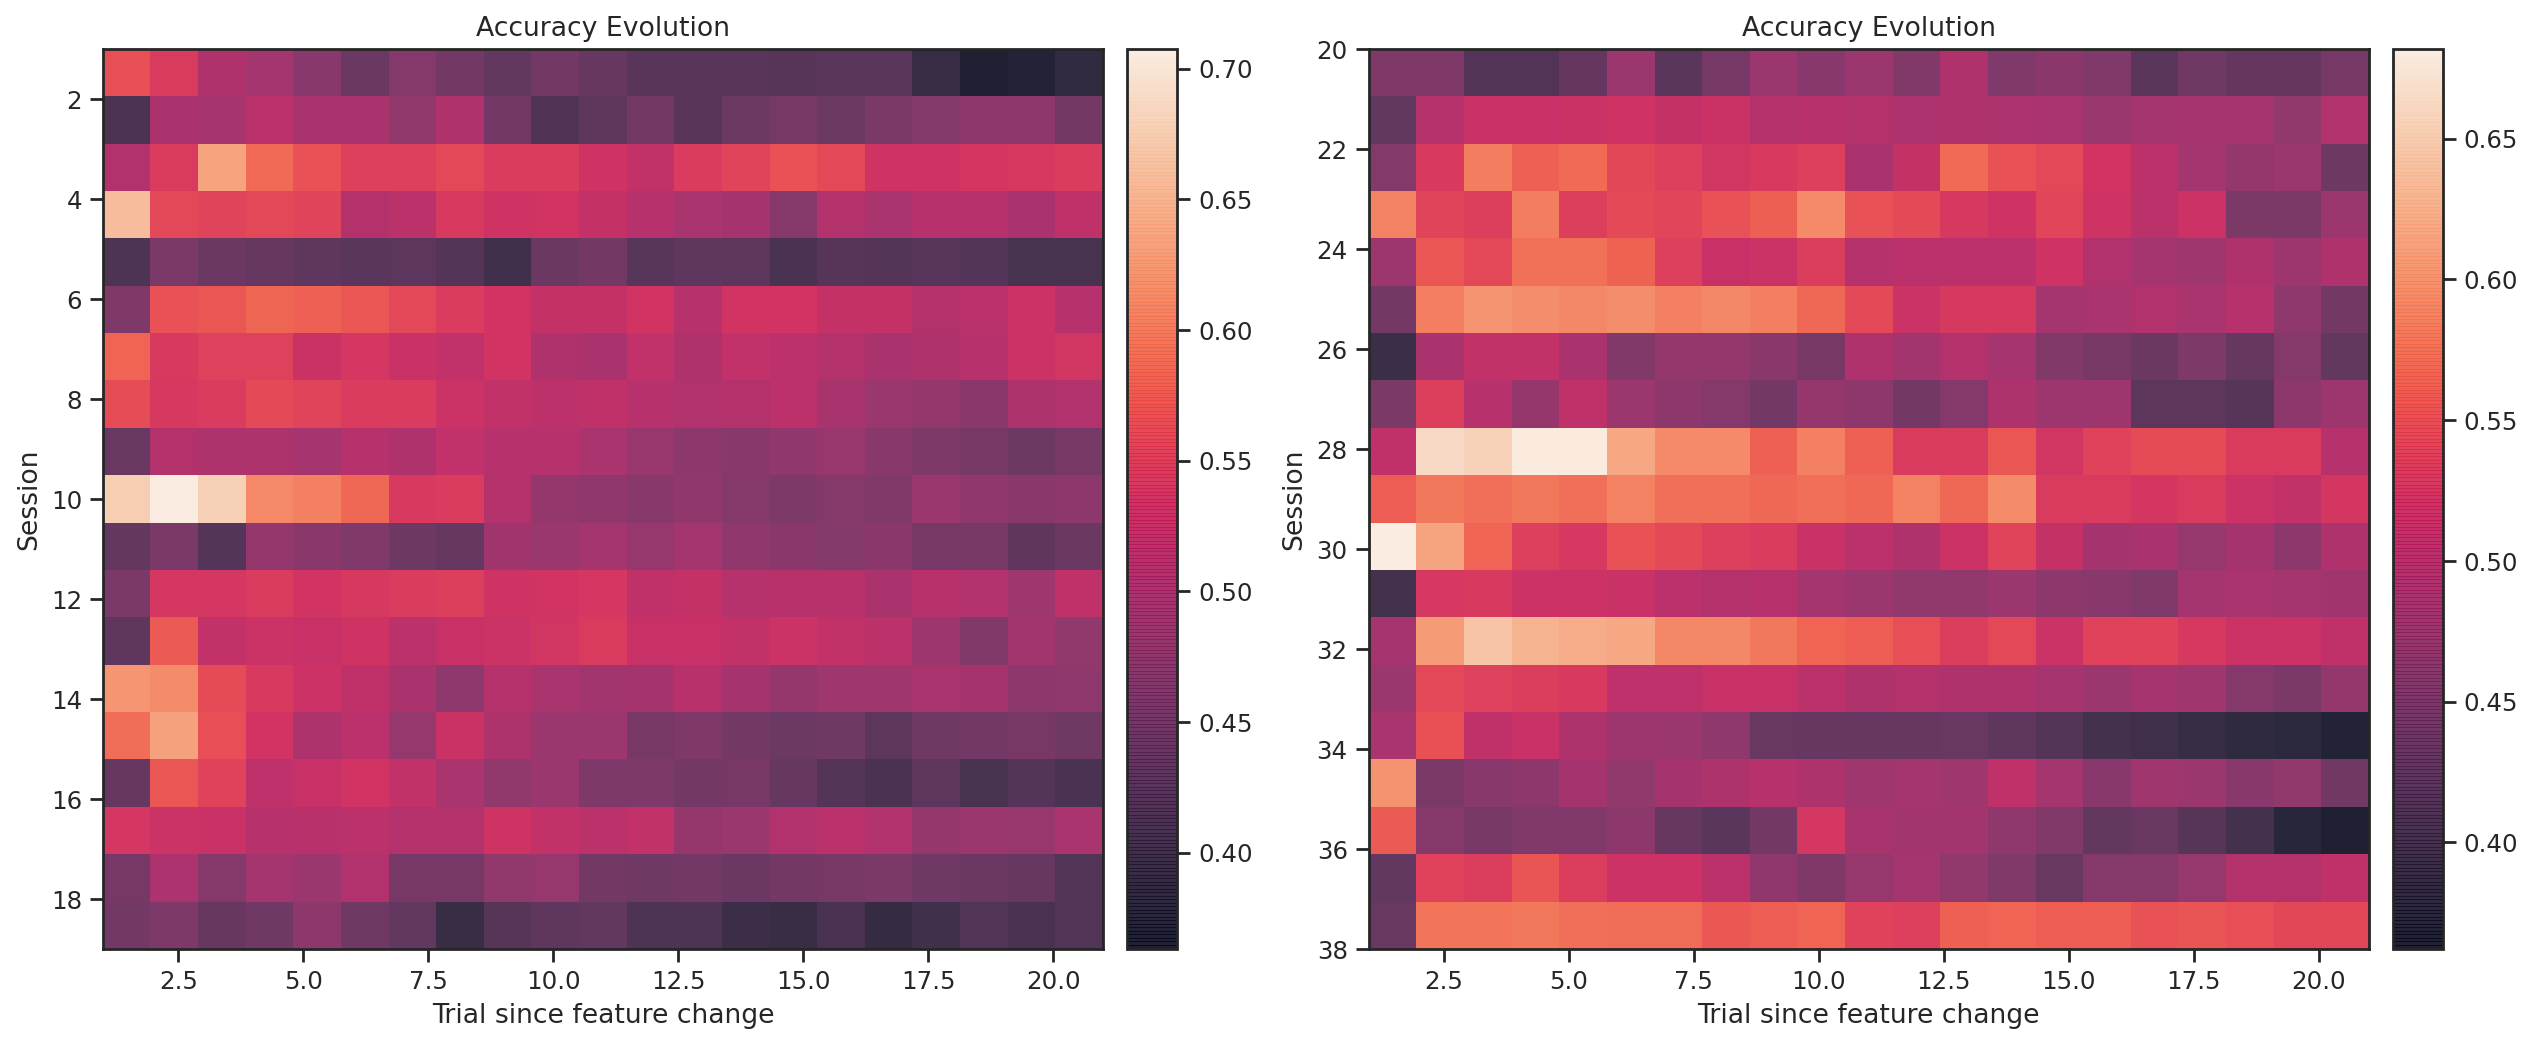

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from google.colab import files
def plot_history_activity(X, ax=None):
  """Plot history accuracy of different sessions

  Args:
    X (ndarray): accuracy (n_sessions by histroy)
    ax: axis on which to display plot
  """
  if ax is None:
    ax = plt.gca()
  if ax == axs[0]:
     y = np.arange(1, 20, 1) 
  else:
     y = np.arange(20, 39, 1)

  x = np.arange(1, 22, 1)
  extent = np.min(x), np.max(x), np.max(y), np.min(y) 

  im = ax.imshow(X[:, :], extent=extent, alpha=0.89)
  divider = make_axes_locatable(ax)
  cax1 = divider.append_axes("right", size="5%", pad=0.15)
  plt.colorbar(im, cax=cax1)
  ax.set(xlabel='Trial since feature change', ylabel='Session', title='Accuracy Evolution')


fig, axs = plt.subplots(1, 2, figsize=(16, 11), dpi=80)
plot_history_activity(accuracies3[:19, :], ax=axs[0])
plot_history_activity(accuracies3[19:, :], ax=axs[1])

plt.savefig('HeatMap.eps', format='eps')
files.download('HeatMap.eps')


In [ ]:
#@title Figure settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [ ]:
#@markdown Execute this cell to enable demo
@widgets.interact(Trial=(1, 20, 1))
def plot_corrs(Trial=2):
     
  features = {'pca': "", 'feedback_type': "",  'response': ""}

  accuracies_list = np.empty((2,38,Trial))
  s = np.empty((38, Trial))

  for i in range(1, Trial + 1):

    accuracies = LogRegmodel([i for i in range(1,39)], features, i, add_init_features='no',
                            combine_hist='yes', by_region="no")
  
    accuracies_list[:,:,i-1] = accuracies.T
    s[:,i-1] = i
  accuracies_plot = np.reshape(accuracies_list,(2,-1))
  s_plot = np.concatenate(s)
  
  plt.figure(figsize=(8,7))
  scatter = plt.scatter(accuracies_plot[1, :]*100, accuracies_plot[0, :]*100, color=np.array([255,0,0])/255, 
                      s=2*(3*s_plot)**2, alpha=0.4)
  kw = dict(prop="sizes", num=Trial, color=np.array([255,0,0])/255, fmt="{x:}",
          func=lambda s: s/60)
  plt.legend(*scatter.legend_elements(**kw),
                      loc="lower right", title="History")
  plt.plot(np.linspace(40, 70), np.linspace(40, 70))
  plt.ylim((40, 70))
  plt.xlim((40, 70))
  plt.title('Choice Prediction Accuracy')
  plt.xlabel("Baseline Model (% accurate)" )
  plt.ylabel("Trial History Model (% accurate)")

interactive(children=(IntSlider(value=2, description='Trial', max=20, min=1), Output()), _dom_classes=('widget…

In [ ]:
mnames_and_sessions = {}

for i in range(1, len(alldat)):
  dat = alldat[i]
  mouse_name = dat["mouse_name"]
  if mouse_name in mnames_and_sessions.keys():
    mnames_and_sessions[mouse_name].append(i)
  else:
    mnames_and_sessions[mouse_name] = [i]


In [ ]:
mnames_and_sessions

{'Cori': [1, 2],
 'Forssmann': [3, 4, 5, 6],
 'Hench': [7, 8, 9, 10],
 'Lederberg': [11, 12, 13, 14, 15, 16, 17],
 'Moniz': [18, 19, 20],
 'Muller': [21, 22, 23],
 'Radnitz': [24, 25, 26, 27, 28],
 'Richards': [29, 30, 31, 32, 33],
 'Tatum': [34, 35, 36, 37],
 'Theiler': [38]}

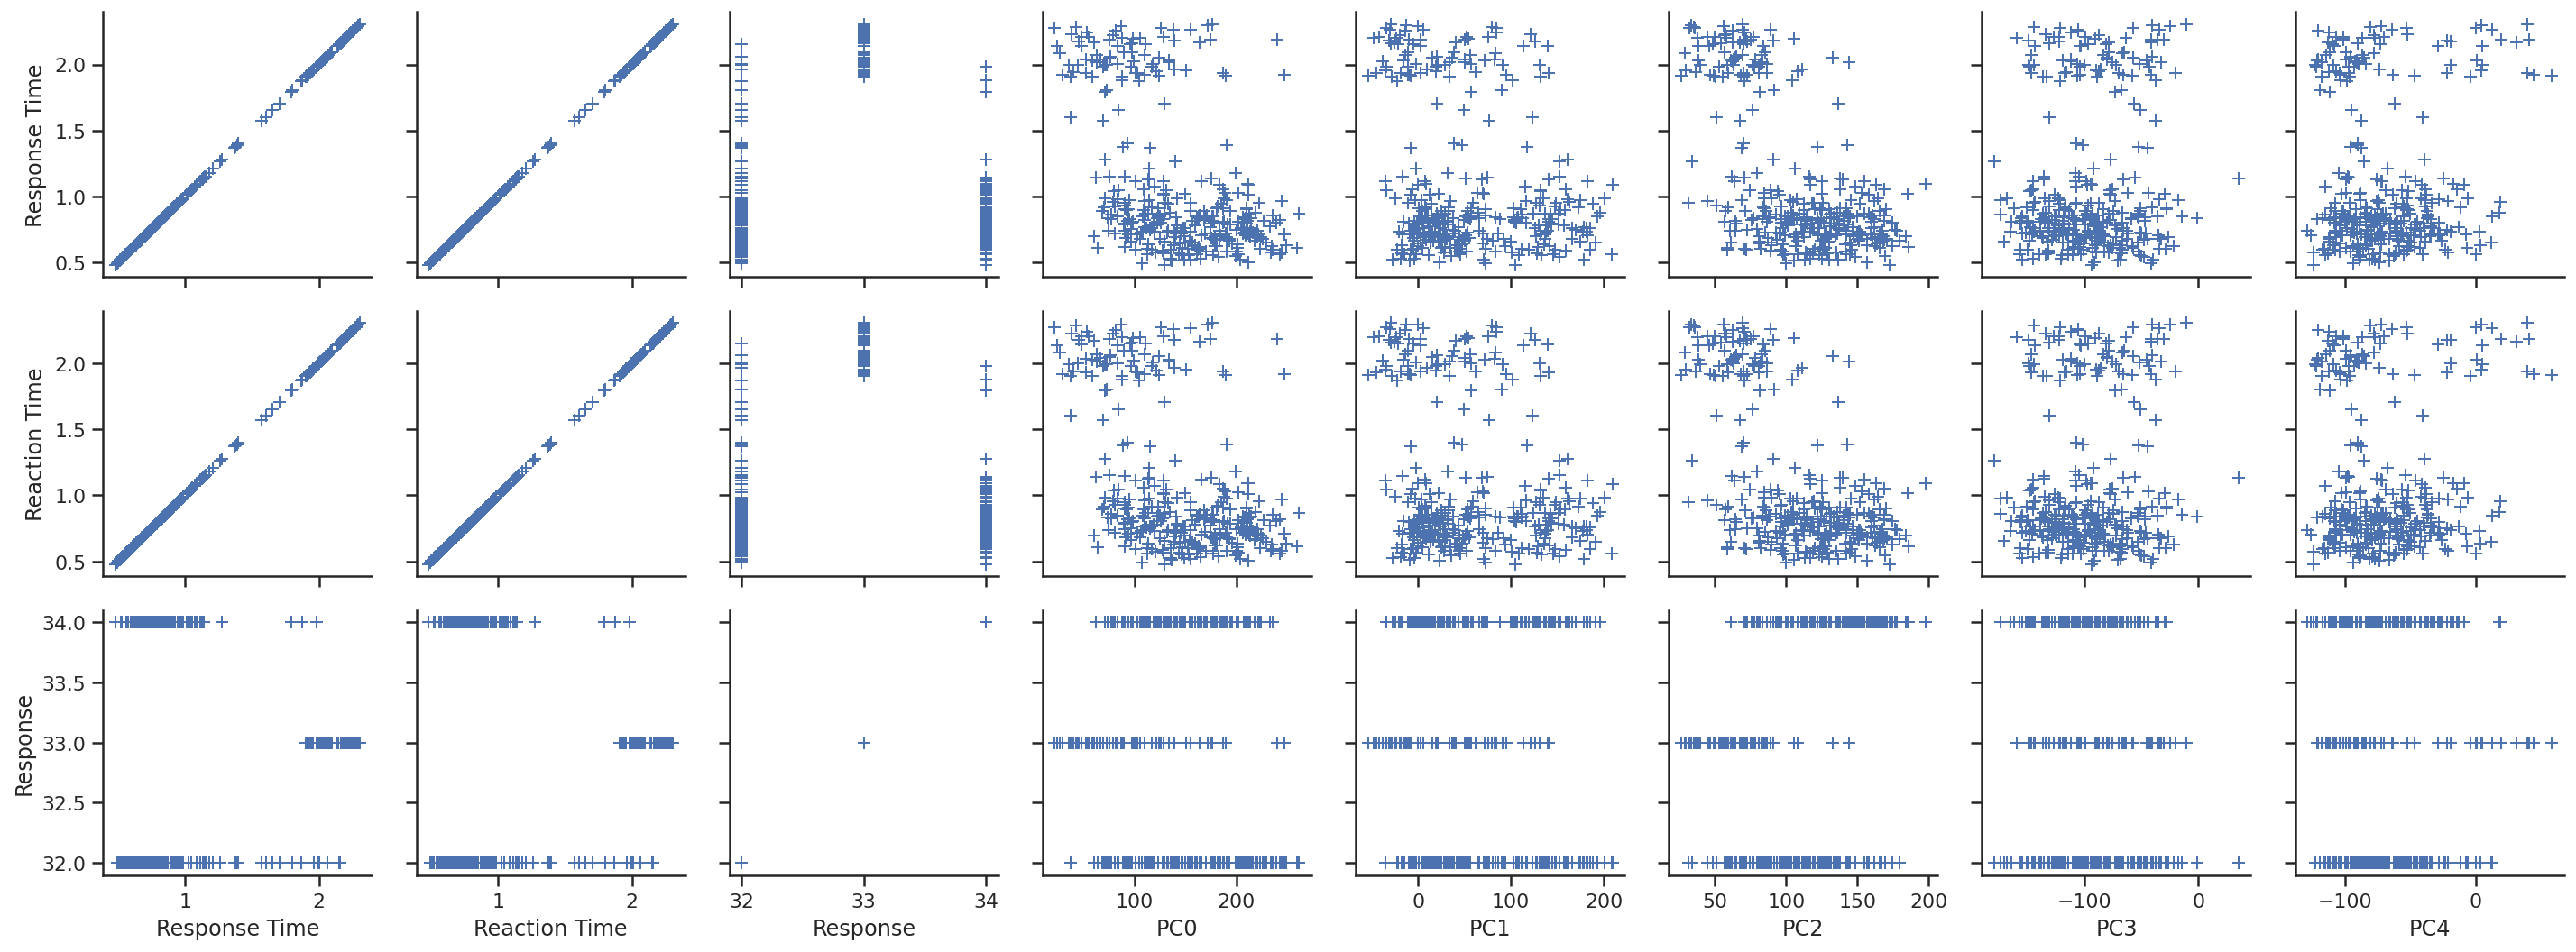

In [ ]:
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import normalize

data = alldat[11]
pca = build_PC(data["spks"])
row = data['spks'].shape[1]

reaction_time = data['response_time'][:, 0]
response_time= data['response_time'][np.where(reaction_time != np.inf)].reshape(row, ) 
response = data['response'][np.where(reaction_time != np.inf)].reshape(row, )
pca = pca[np.where(reaction_time != np.inf)]
reaction_time = reaction_time[np.where(reaction_time != np.inf)].reshape(row, ) 



df_dict = {"Response Time": response_time, "Reaction Time": reaction_time,
           "Response": response, "PC0": pca[:, 0].reshape(row, ), "PC1": pca[:, 1].reshape(row, ), 
           "PC2": pca[:, 2].reshape(row, ),
           "PC3": pca[:, 3].reshape(row, ), "PC4": pca[:, 4].reshape(row, )}

df = pd.DataFrame(data=df_dict, columns=["Response Time", "Reaction Time", "Response", 
                                        "PC0", "PC1", "PC2", "PC3", "PC4"])

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, x_vars=["Response Time", "Reaction Time", "Response", "PC0", "PC1", "PC2", "PC3", "PC4"],
                      y_vars=["Response Time", "Reaction Time", "Response"],
                 diag_kind="reg", markers="+",
                 plot_kws=dict(s=50, edgecolor="pink", linewidth=1),
                 diag_kws=dict(shade=True))



In [ ]:
print(response)

[33. 34. 33. 34. 32. 32. 32. 32. 34. 32. 32. 32. 34. 33. 32. 33. 34. 34.
 34. 34. 34. 32. 34. 32. 32. 33. 34. 34. 32. 33. 34. 32. 33. 33. 32. 32.
 32. 34. 34. 34. 32. 33. 34. 32. 32. 34. 34. 32. 34. 32. 32. 34. 32. 32.
 32. 34. 34. 32. 32. 32. 33. 33. 32. 34. 33. 32. 32. 34. 33. 34. 34. 34.
 33. 34. 33. 34. 32. 34. 32. 34. 34. 34. 32. 33. 34. 32. 32. 33. 34. 34.
 32. 34. 32. 34. 32. 32. 33. 32. 34. 33. 32. 32. 32. 34. 34. 32. 33. 34.
 34. 34. 34. 32. 33. 34. 32. 34. 33. 33. 32. 32. 32. 32. 33. 34. 33. 33.
 34. 32. 32. 33. 32. 32. 34. 32. 34. 32. 34. 32. 34. 32. 33. 34. 32. 32.
 34. 34. 32. 33. 32. 32. 33. 34. 34. 33. 33. 34. 33. 34. 34. 32. 34. 32.
 34. 34. 32. 34. 34. 34. 34. 32. 34. 34. 32. 32. 32. 33. 32. 34. 33. 32.
 32. 32. 32. 32. 32. 32. 33. 34. 32. 33. 34. 32. 32. 34. 34. 33. 32. 32.
 32. 32. 32. 32. 32. 32. 33. 32. 32. 32. 33. 34. 32. 32. 32. 33. 34. 32.
 34. 32. 33. 32. 32. 33. 32. 32. 32. 32. 33. 34. 34. 34. 34. 34. 32. 32.
 32. 34. 32. 34. 32. 34. 34. 32. 33. 34. 32. 34. 32

In [ ]:

nComp = 7
explained_vraince = np.zeros((len(alldat), nComp))
for i in range(0, len(alldat)):
    dat = alldat[i]
    dat_spks = dat['spks']
    #build pc's and obtain explained variance
    expl_ratio = build_PC_ExplVariance(dat_spks, nComp)
    expl_ratio = expl_ratio[:, np.newaxis]
    expl_ratio = np.cumsum(expl_ratio)[:, np.newaxis].T
    explained_vraince[i, :] = expl_ratio[0, :]


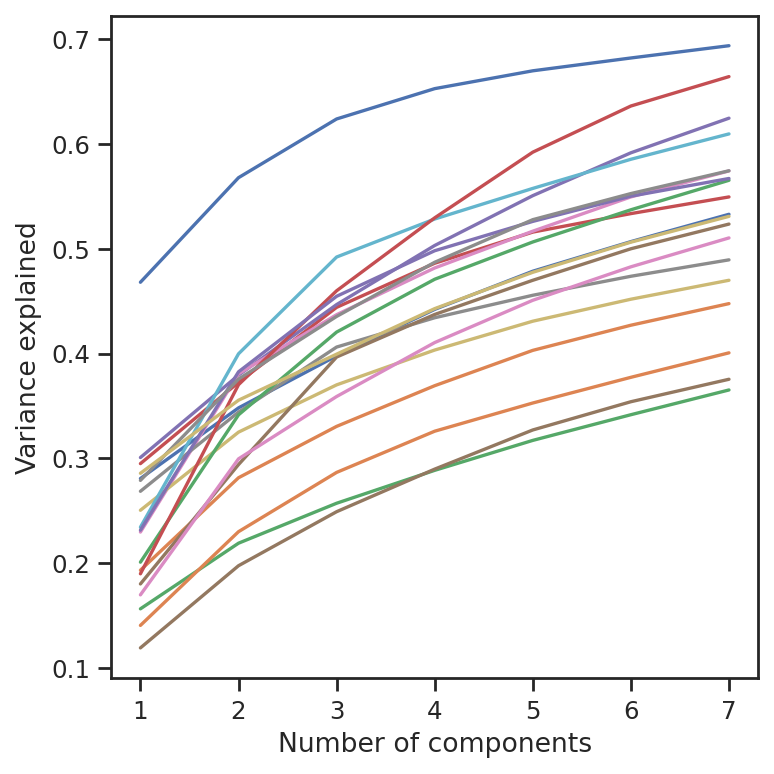

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 576x432 with 0 Axes>

In [ ]:

def plot_variance_explained(variance_explained):
  """
  Plots eigenvalues.

  Args:
    variance_explained (numpy array of floats) : Vector of variance explained
                                                 for each PC

  Returns:
    Nothing.

  """
  plt.plot(np.arange(1, len(variance_explained) + 1), variance_explained)


plt.figure(figsize=(5,5), dpi=80)
for i in range(explained_vraince.shape[0]//2):
  plot_variance_explained(explained_vraince[i, :])

plt.xlabel('Number of components')
plt.ylabel('Variance explained')
plt.show()

plt.savefig('ExplVar.eps', format='eps')
files.download('ExplVar.eps')


# **Linear Regression Model as a Package. PCA Prediction**

In [ ]:
#@title Linear Regression Model for PCAs { form-width: "1px" }

def LinRegmodel(sessions, nPCs, features, num_history, add_init_features, 
             combine_hist, by_region="no"):
  
    
  """
    to predict neural activity by using a linear regression model
    the method of scoring is explained variance

    Baseline model: uses only the stimulus activity of current trial (contrast_left and contrast_right of current trial) 

    Trial history model: uses the stimulus activity of current trial in combination to history of 
                        behavioral and neural data. 

    Inputs:

      sessions:     list of sessions to be plotted

      num_history: a scalar defining how many trial back in history to be considered in the design matrix

      features:    a dictionary of fearures--keys only, passed as strings--to be considered in designing the matrix

      add_init_feature: (yes/no) adding the current features in the design matrix

      comine history:   (yes/no) adding the current pca to the design matrix  while not using the current data of other defined features.

    Output:

      an array (number of sessions by 2). 
      each row contains average of accuracy of the trial 
      history model on the first column and average of explained 
      variance of the baseline model on the second column 


  """ 

  from sklearn.linear_model import LinearRegression
  from sklearn.model_selection import cross_val_score
  from sklearn.preprocessing import normalize

  if by_region == 'no':

    explvar_by_session = np.empty((nPCs, len(sessions), 2))
    explvar_by_session[:] = np.NaN
      
    for i,session in enumerate(sessions):

      dat = alldat[session]

      pca = build_PC(dat['spks'])

      features['pca'] = pca

      for feature in features.keys():
        if feature == "pca":
          continue  
        else:
          features[feature] = dat[feature]

    # Base line Model

      Base_line3 = normalize(np.hstack((dat["contrast_right"][:,np.newaxis], 
                                        dat["contrast_left"][:,np.newaxis])), norm='l2', axis=0)

    # Poisson regression
      row = pca.shape[0]
      X = build_design_matrix(features, num_history, row, add_init_features, combine_hist)
      X = normalize(np.append(dat["contrast_right"][:,np.newaxis],X,axis=1), norm='l2', axis=0)
      X = normalize(np.append(dat["contrast_left"][:,np.newaxis],X,axis=1), norm='l2', axis=0)

      expl_var2 = np.empty((pca.shape[1],1))
      expl_basl2 = np.empty((pca.shape[1],1))
      expl_var2[:] = np.NaN
      expl_basl2[:] = np.NaN

      for j in range(pca.shape[1]):

        y = pca[:,j]

    # k=8 crossvalidation and L2 regularization
        expl_temp = cross_val_score(LinearRegression(), X, y, cv=8, scoring='explained_variance')
        expl_basl_temp = cross_val_score(LinearRegression(), Base_line3, y, cv=8, scoring='explained_variance')

        explvar_by_session[j, i, 0] = np.mean(expl_temp)
        explvar_by_session[j, i, 1] = np.mean(expl_basl_temp)

        # This section of the code is run if statistics by region is required
  elif by_region == 'yes':

      nareas = 7 
      explvar_by_session = np.zeros((nareas, nPCs, len(sessions), 2))
      explvar_by_session[:] = np.NaN

      for i,session in enumerate(sessions):

        dat = alldat[session]

        # groupings of brain regions

        regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia"
                  ,"cortical subplate", "other"]

        brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                        ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT"
                        , "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                        ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                        ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", 
                        "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                        ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                        ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                        ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                        ]

        
        NN = len(dat['brain_area']) # number of neurons
        barea = nareas * np.ones(NN, )
        for j in range(nareas):
          barea[np.isin(dat['brain_area'], brain_groups[j])] = j # assign a number to each region


        for j in range(nareas):

          if dat["spks"][barea==j].shape[0] < 5:
            continue
          elif np.all(dat['spks'][barea==j][:,:] == 0):
            continue
          else:
            pca = build_PC(dat['spks'][barea==j])

          features['pca'] = pca

          for feature in features.keys():
            if feature == "pca":
              continue  
            else:
              features[feature] = dat[feature]

          # Base line Model

          Base_line3 = normalize(np.hstack((dat["contrast_right"][:,np.newaxis], 
                                          dat["contrast_left"][:,np.newaxis])), norm='l2', axis=0)

      # Poisson regression
          row = pca.shape[0]
          X = build_design_matrix(features, num_history, row, add_init_features, combine_hist)
          X = normalize(np.append(dat["contrast_right"][:,np.newaxis],X,axis=1), norm='l2', axis=0)
          X = normalize(np.append(dat["contrast_left"][:,np.newaxis],X,axis=1), norm='l2', axis=0)

          expl_var2 = np.empty((pca.shape[1],1))
          expl_basl2 = np.empty((pca.shape[1],1))
          expl_var2[:] = np.NaN
          expl_basl2[:] = np.NaN

          for iP in range(pca.shape[1]):

            y = pca[:,iP]

        # k=8 crossvalidation and L2 regularization
            expl_temp = cross_val_score(LinearRegression(), X, y, cv=8, scoring='explained_variance')
            expl_basl_temp = cross_val_score(LinearRegression(), Base_line3, y, cv=8, scoring='explained_variance')

            explvar_by_session[j, iP, i, 0] = np.mean(expl_temp)
            explvar_by_session[j, iP, i, 1] = np.mean(expl_basl_temp)

  return explvar_by_session

In [ ]:
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia"
          , "cortical subplate", "other"]
          
features = {'pca': "", 'feedback_type': "", 'contrast_right': "", 
                    'contrast_left': "", 'response': ""}

nPCs = 5;

Expl_Vars = LinRegmodel([3, 11, 26, 29, 34, 38], nPCs, features, 1, add_init_features='no',
                         combine_hist='no', by_region='no')

print(Expl_Vars)

[[[-0.35100036  0.16644083]
  [ 0.5741208   0.53669517]
  [ 0.17559008  0.22273808]
  [ 0.0491869  -0.0399068 ]
  [-0.52540123 -1.45192245]
  [ 0.14445797  0.20849859]]

 [[ 0.03748949  0.14462516]
  [ 0.25134407  0.16881375]
  [-0.094832    0.02763922]
  [-0.99633912 -0.1954446 ]
  [ 0.15547496  0.31526152]
  [-0.05107462 -0.28241845]]

 [[ 0.04857451 -0.03725449]
  [ 0.38497368  0.23774531]
  [-0.12526581  0.0381603 ]
  [-0.40853489 -0.21225209]
  [ 0.21962153 -0.01952813]
  [ 0.30755547  0.07197484]]

 [[-0.11022032  0.0082926 ]
  [ 0.1390697  -0.01676196]
  [ 0.23893245  0.19593482]
  [-0.39478808 -0.06360892]
  [ 0.02547997 -0.01890002]
  [-0.26832767  0.07675427]]

 [[ 0.11149887 -0.05228863]
  [ 0.10687544 -0.19041594]
  [ 0.09947917  0.19586741]
  [-0.31780733  0.10182631]
  [-0.04156483  0.13114134]
  [ 0.40587348  0.18262175]]]


# **Miscellaneous**

In [ ]:
#@title Poisson Regression Model

from sklearn.linear_model import PoissonRegressor


# Base line Model

Base_line3 = normalize(np.hstack((dat["contrast_right"][:,np.newaxis], 
                        dat["contrast_left"][:,np.newaxis])), norm='l2', axis=0)




# Poisson regression
features = {'pca': pca, 'feedback_type': dat["feedback_type"], 'contrast_right': dat["contrast_right"], 
            'contrast_left': dat["contrast_left"], 'response_time': dat["response_time"], 'response': dat["response"]}
row = pca.shape[0]
X = build_design_matrix(features, 1, row, add_init_features='no', combine_hist='no')
X = normalize(np.append(dat["contrast_right"][:,np.newaxis],X,axis=1), norm='l2', axis=0)
X = normalize(np.append(dat["contrast_left"][:,np.newaxis],X,axis=1), norm='l2', axis=0)

expl_var2 = np.empty((dat['spks'].shape[0],2))
expl_basl2 = np.empty((dat['spks'].shape[0],2))
expl_var2[:] = np.NaN
expl_basl2[:] = np.NaN

for iC in range(dat["spks"].shape[0]):

  y = dat["spks"][iC,:,51:130].sum(1) #

  if np.sum(y) > 100:

# k=8 crossvalidation and L2 regularization
    expl_temp = cross_val_score(PoissonRegressor(max_iter=), X, y, cv=8, scoring='explained_variance')
    expl_basl_temp = cross_val_score(PoissonRegressor(solver='liblinear'), Base_line3, y, cv=8, scoring='explained_variance')

    expl_var2[iC,0] = np.mean(expl_temp)
    expl_basl2[iC,0] = np.mean(expl_basl_temp)
  expl_var2[iC,1] = barea[iC]
  expl_basl2[iC,1] = barea[iC]


## Use linear regression for PCA predictions 

SyntaxError: ignored

In [ ]:
#@title Linear Regression Model for PCAs

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize

# Base line Model

Base_line3 = normalize(np.hstack((dat["contrast_right"][:,np.newaxis], 
                        dat["contrast_left"][:,np.newaxis])), norm='l2', axis=0)

# Poisson regression
features = {'pca': pca, 'feedback_type': dat["feedback_type"], 'contrast_right': dat["contrast_right"], 
            'contrast_left': dat["contrast_left"], 'response_time': dat["response_time"], 'response': dat["response"]}
row = pca.shape[0]
X = build_design_matrix(features, 1, row, add_init_features='no', combine_hist='no')
X = normalize(np.append(dat["contrast_right"][:,np.newaxis],X,axis=1), norm='l2', axis=0)
X = normalize(np.append(dat["contrast_left"][:,np.newaxis],X,axis=1), norm='l2', axis=0)

expl_var2 = np.empty((dat['spks'].shape[0],1))
expl_basl2 = np.empty((dat['spks'].shape[0],1))
expl_var2[:] = np.NaN
expl_basl2[:] = np.NaN

for iC in range(pca.shape[1]):

  y = pca[:,iC]

# k=8 crossvalidation and L2 regularization
  expl_temp = cross_val_score(LinearRegression(), X, y, cv=8, scoring='explained_variance')
  expl_basl_temp = cross_val_score(LinearRegression(), Base_line3, y, cv=8, scoring='explained_variance')

  expl_var2[iC] = np.mean(expl_temp)
  expl_basl2[iC] = np.mean(expl_basl_temp)

In [ ]:
plt.subplot(1,3,2)
plt.plot(expl_basl2)

plt.figure()
plt.subplot(1,3,1)
plt.plot(expl_var2)

plt.subplot(1,3,3)
plt.plot(expl_var2 - expl_basl2)

In [ ]:
#@title AutoRegressive Model for Behavioural Response

# x1 = dat["response"][0:-2]
# x1 = x1[:, np.newaxis]**[0,1]

# x2 = dat["response"][1:-1]

# p, res, rnk, s = np.linalg.lstsq(x1, x2, rcond=None)

# print(p)
# print('alpha_0 = {a0:.2f}, alpha_1 = {a1:.2f}'.format(a0=p[0], a1=p[1]))

r = 5
x = dat["response"][0: len(dat['response'])//2]
x1, x2, p = AR_model(x, r)
plot_training_fit(x1, x2, p, r)



test = dat["response"][len(dat['response'])//2 :]


x1_test, x2_test = build_trial_delay_matrices(test, r)
print(len(x1_test) + 1)



fig = plt.figure() 
plt.scatter(x2_test+np.random.standard_normal(len(x2_test))*0.02, 
            np.dot(x1_test.T, p), alpha=0.5)

mytitle = 'Testing fit, order {r:d} AR model, err = {err:.3f}'
plt.title(mytitle.format(r=r, err=error_rate(test, p)))

plt.xlabel('test x')
plt.ylabel('estimated x')

In [ ]:
#@title Sliding window function For Fano Factor with gaussian option
from scipy import signal
def bin_change(x,old_binsize,new_binsize,option='box'):
  '''
  x is the 3D array containing spikes x trial x bins
  old_binsize is the original bin size (here it is 10 ms)
  old_binsize is the new bin size (e.g. 50 or 100 ms)
  this code implements the sliding window for changing the binsize
  '''
  numBin = int(new_binsize/old_binsize)       # caution: for now it only works if mod(old_binsize,new_binsize)==0
  
  if option == 'box':
    sliding_vec = np.ones((numBin,))
  elif option == 'gauss':
    sliding_vec = signal.gaussian(numBin, std=1)

  output = np.zeros_like(x)
  for neuron in range(x.shape[0]):
    for trial in range(x.shape[1]):
      
      output[neuron,trial,:]= np.convolve(x[neuron,trial,:],sliding_vec,'same') #careful with the edge effect. another option is valid which reduces the size of the vector
  
  return output


  #@title Fano Factor with chaning the bin size
from scipy import signal

def errorfill(x, y, yerr, color=None, alpha_fill=0.1, ax=None,label=None):
    ax = ax if ax is not None else plt.gca()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    
    ax.fill_between(x, ymax, ymin, alpha=alpha_fill,color=color)
    ax.plot(x, y,color=color,label=label)



stim_conditions = {0: np.logical_and(vis_left==0, vis_right>0),
              1: np.logical_and(vis_left>0 , vis_right==0),
              2: np.logical_and(vis_left==0 , vis_right==0),
              3: np.logical_and(vis_left>0, vis_right>0)
              }
  

for i in range(len(stim_conditions)):
  for j in range(nareas):
    fig = plt.figure(1)
    ax = plt.subplot(1,nareas,j+1) 
    y1 = dat['spks'][barea==j][:,stim_conditions[i]]
    y1 = bin_change(y1,10,50,'gauss')
    
    plt.plot(np.nanmean(np.var(y1, axis = 1)/np.mean(y1, axis = 1), axis = 0))

    if j==0:
      plt.legend(['right only', 'left only', 'neither', 'both'], fontsize=12)

    ax.set(xlabel = 'binned time', ylabel = 'FF', title = regions[j])

In [ ]:
#@title Functions for Poisson Regression Model
from scipy.optimize import minimize

def neg_log_lik_lnp(theta, X, y):
  """Return -loglike for the Poisson GLM model.

  Args:
    theta (1D array): Parameter vector.
    X (2D array): Full design matrix.
    y (1D array): Data values.

  Returns:
    number: Negative log likelihood.

  """ 
  
  # Compute the Poisson log likeliood
  rate = np.exp(X @ theta)
  log_lik = y @ np.log(rate) - np.sum(rate)

  return -log_lik


def fit_lnp(y, X):
  """Obtain MLE parameters for the Poisson GLM.

  Args:
    X (XD array): Design matrix
    y: Spike counts measured at each timepoint    

  Returns:
    1D array: MLE parameters

  """ 

  # Build the design matrix
  constant = np.ones_like(y)
  X = np.column_stack([constant, X])

  # Use a random vector of weights to start (mean 0, sd .2)
  x0 = np.random.normal(0, .2, X.shape[1])

  # Find parameters that minmize the negative log likelihood function
  res = minimize(neg_log_lik_lnp, x0, args=(X, y))

  return res["x"]

# New Section

`alldat` contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. For each `dat = alldat[k]`, you have the following fields:

* `dat['mouse_name']`: mouse name
* `dat['date_exp']`: when a session was performed
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_times']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['wheel']`: exact position of the wheel that the mice uses to make a response, binned at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position. 
* `dat['lfp']`: recording of the local field potential in each brain area from this experiment, binned at `10ms`.
* `dat['brain_area_lfp']`: brain area names for the LFP channels. 
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['waveform_w']`: temporal components of spike waveforms. `w@u` reconstructs the time by channels action potential shape. 
* `dat['waveform_u]`: spatial components of spike waveforms.
* `dat['%X%_passive']`: same as above for `X` = {`spks`, `lfp`, `pupil`, `wheel`, `contrast_left`, `contrast_right`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 





### Visualize Representational Similarity Matrices

In [ ]:
#@markdown Get RSM's on all images fed into the network

def calculate_numpy_RSM(features, features_comp=None, stack=False, 
                        centered=False):
    """
    calculate_numpy_RSM(features)
    Calculates representational similarity matrix (RSM) between two feature 
    matrices using pairwise cosine similarity. If centered is True, this 
    calculation is equivalent to pairwise Pearson correlations. Uses numpy.
    Required args:
    - features (2D np array): feature matrix (items x features)
    Optional args
    - features_comp (2D np array): second feature matrix (items x features). 
        If None, features is compared to itself. (default: None)
    - stack (bool): if True, feature and features_comp are first stacked 
        along the items dimension, and the resulting matrix is compared to 
        itself. (default: False)
    - centered (bool): if True, the mean across features is first subtracted 
        for each item. (default: False)  
    Returns:
    - rsm (2D np array): similarity matrix 
        (nbr features items x nbr features_comp items)
    """

    if features_comp is None:
        if stack:
            raise ValueError(
                "stack cannot be set to True if features_comp is None."
                )
        features_comp = features
    else:
        if features.shape != features_comp.shape:
            raise ValueError(
                "features and features_comp should have the same shape, but "
                f"found shapes {features.shape} and {features_comp.shape} "
                "respectively."
                )
        features = np.concatenate((features, features_comp), axis=0)
        features_comp = features

    norm_features, norms = [], []
    for _features in [features, features_comp]:
        _features = _features.reshape(len(_features), -1) # flatten
        
        if centered:
            _features -= np.mean(_features, axis=1, keepdims=True)

        # calculate L2 norms
        _norms = np.linalg.norm(_features, axis=1, keepdims=True) 

        norm_features.append(_features)
        norms.append(_norms)

    norms = np.maximum(np.dot(norms[0], norms[1].T), 1e-8) # raise to tolerance

    rsm = np.dot(norm_features[0], norm_features[1].T) / norms

    return rsm

to_tensor = transforms.ToTensor()
normalize = transforms.Normalize(mean=[0.485, 0.485, 0.485,],
                                 std=[0.229, 0.229, 0.229])

resize = transforms.Resize((256, 256))
parent_dir = 'natural_scenes_dataset'
all_feature_vectors = pd.DataFrame(columns=[int(image_label) for image_label in image_labels])


# for image_label in image_labels:  

#   directory = f"image{image_label}"
#   path = os.path.join(parent_dir, directory)

#   # 1. Load the image with Pillow library
#   img = Image.open(path+f'/image_{image_label}.jpeg').convert('RGB')

#   # 2. Create a PyTorch Variable with the transformed image
#   t_img = normalize(to_tensor(resize(img))).unsqueeze(0).to(DEVICE)

#   output = get_feature_vectors(resnet, "avgpool", t_img)
#   all_feature_vectors.loc[:, int(image_label)] = output[0].reshape((output.shape[1], 1))[:, 0]
#   for tr_j, transform in enumerate(transformations[1:]):
#     path_tr = f'natural_scenes_dataset/image{image_label}/image_{image_label}_transform_{tr_j}.jpeg'
#     transformed_image = Image.open(path_tr).convert('RGB')
#     t_img = normalize(to_tensor(resize(transformed_image))).unsqueeze(0).to(DEVICE)
#     output = get_feature_vectors(resnet, "avgpool", t_img)
#     all_feature_vectors.loc[:, f'{int(image_label)}_{tr_j}'] = output[0].reshape((output.shape[1], 1))[:, 0]

# numpy_feature_vectors = all_feature_vectors.to_numpy().T
RSM = calculate_numpy_RSM(feature_vectors.to_numpy().T)


In [ ]:
import seaborn as sns

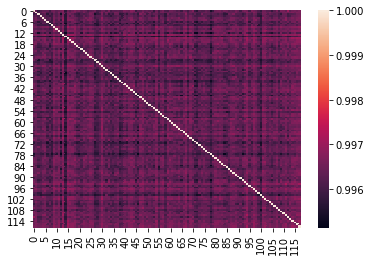

In [ ]:
sns.heatmap(RSM)

In [ ]:
#@markdown Plot RSMs

def plot_RSMs(dataset, rsms, target_class_values, titles=None, 
                       sorting_latent="shape"):
    """
    plot_RSMs(dataset, rsms, target_class_values)
    Plots representational similarity matrices for dSprites data.
    Required args:
    - dataset (dSpritesDataset): dSprites dataset
    - rsms (list): list of 2D RSMs arrays.
    - target_class_values (list): list of target class values for each 
        element in the corresponding RSM.
    Optional args:
    - titles (list): title for each RSM. (default: None)
    - sorting_latent (str): name of latent class/feature to sort rows 
        and columns by. (default: "shape")
    """

    if isinstance(rsms, list):
        if len(rsms) != len(target_class_values):
            raise ValueError(
                f"Must pass as many target_class_values as rsms ({len(rsms)})."
                ) 
        if not isinstance(titles, list) or len(titles) != len(rsms):
            raise ValueError(
                f"Must pass as many titles as rsms ({len(rsms)})."
                )
    
    else: # place in lists
        rsms = [rsms]
        target_class_values = [target_class_values]
        titles = [titles]
    
    for r, rsm_target_class_values in enumerate(target_class_values):
        if len(rsm_target_class_values) != len(rsms[r]):
            raise ValueError(
                "Must provide as many target_class_values as RSM rows/cols "
                f"({len(rsms[r])})."
                )
        sorter = np.argsort(rsm_target_class_values)
        target_class_values[r] = rsm_target_class_values[sorter]
        rsms[r] = rsms[r][sorter][:, sorter]

    _, axes = plot_util.plot_RSMs(rsms, titles)

    dataset._check_class_name(sorting_latent)

    for subax, sub_targ_class_vals in zip(axes.flatten(), target_class_values):
        
        # check that target classes are sorted, and collect unique values 
        # and where they start
        target_change_idxs = np.insert(
            np.where(np.diff(sub_targ_class_vals))[0] + 1, 
            0, 0)
        unique_values = [sub_targ_class_vals[i] for i in target_change_idxs]
        if sorting_latent == "shape":
            unique_values = dataset.get_shapes_from_values(unique_values)
        elif sorting_latent == "scale":
            unique_values = [f"{value:.1f}" for value in unique_values]
        
        # place major ticks at class boundaries and class labels between
        sorting_latent_str = sorting_latent
        if sorting_latent in ["shape", "scale"]:
            edge_ticks = np.append(
                target_change_idxs, len(sub_targ_class_vals)
                )
            label_ticks = target_change_idxs + np.diff(edge_ticks) / 2

            for axis, rotation in zip(
                [subax.xaxis, subax.yaxis], ["horizontal", "vertical"]
                ):
                if rotation == "horizontal":
                    kwargs = {"ha": "center"}
                else:
                    kwargs = {"va": "center"}

                axis.set_ticks(edge_ticks.tolist())
                axis.set_tick_params(width=2, length=10, which="major")
                axis.set_ticklabels("", minor=False)

                axis.set_ticks(label_ticks, minor=True)
                axis.set_tick_params(length=0, which="minor")
                axis.set_ticklabels(
                    unique_values, minor=True, fontsize=14, rotation=rotation, 
                    **kwargs
                    )

        else:
            if sorting_latent == "orientation":
                sorting_latent_str = f"{sorting_latent} (in radians)"
                nticks = 9
            elif sorting_latent in ["posX", "posY"]:
                nticks = 11

            possible_values = dataset.latent_class_values[sorting_latent]            
            min_val = possible_values.min()
            max_val = possible_values.max()

            ticks = np.linspace(0, len(sub_targ_class_vals), nticks)
            ticklabels = np.linspace(min_val, max_val, nticks)
            ticklabels = [f"{ticklabel:.1f}" for ticklabel in ticklabels]      

            for axis in [subax.xaxis, subax.yaxis]:
                axis.set_ticks(ticks)
                axis.set_ticklabels(ticklabels)

        subax.set_xlabel(sorting_latent_str, labelpad=10)


natural_scenes_data_loader = torch.utils.data.DataLoader(image_dataset,
                                                   batch_size=16,
                                                   shuffle=True,)

for batch in natural_scenes_train_loader:
  images, labels = batch